In [1]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

from datetime import datetime

%matplotlib inline
sns.set_theme(style="whitegrid")

import warnings

# Ignore all warnings 
warnings.filterwarnings("ignore")

## Exploratory Data Analysis & Data Cleaning
- [Loading data](#1)
  - Pandas Build-in functions
  - Dataframe sample display
  - Merging datasets
- [General statistics of datasets](#2)
  - Data Types
  - Data statistics
  - Mssing data
- [Data Visualization](#3)
  - Deep diving in specific parameters
  - Visualizing variable distribution
- [Data Cleaning](#4)
  - Missing data/Empty values
  - Duplicates
- [Format/Convert Data](#5)
  - Dates
  - Negative Data
  - Missing Data 
- [Saving the data ](#6)


### 1. Loading data

In [8]:
pd.set_option('display.max_columns', None)

In [10]:
pd.set_option('display.max_rows', None)

In [12]:
churn = pd.read_csv('churn_data.csv')

In [14]:
churn.head()

id  churn
0  48ada52261e7cf58715202705a0451c9      0
1  24011ae4ebbe3035111d65fa7c15bc57      1
2  d29c2c54acc38ff3c0614d0a653813dd      0
3  764c75f661154dac3a6c254cd082ea7d      0
4  bba03439a292a1e166f80264c16191cb      0

In [16]:
customer = pd.read_csv('customer_data.csv')
price = pd.read_csv('historical_price_data.csv')

In [18]:
#making copies of data sets
churn_copy = churn.copy()
customer_copy = customer.copy()
price_copy = price.copy()

In [20]:
customer.head()

id                      activity_new  \
0  48ada52261e7cf58715202705a0451c9  esoiiifxdlbkcsluxmfuacbdckommixw   
1  24011ae4ebbe3035111d65fa7c15bc57                               NaN   
2  d29c2c54acc38ff3c0614d0a653813dd                               NaN   
3  764c75f661154dac3a6c254cd082ea7d                               NaN   
4  bba03439a292a1e166f80264c16191cb                               NaN   

   campaign_disc_ele                     channel_sales  cons_12m  \
0                NaN  lmkebamcaaclubfxadlmueccxoimlema    309275   
1                NaN  foosdfpfkusacimwkcsosbicdxkicaua         0   
2                NaN                               NaN      4660   
3                NaN  foosdfpfkusacimwkcsosbicdxkicaua       544   
4                NaN  lmkebamcaaclubfxadlmueccxoimlema      1584   

   cons_gas_12m  cons_last_month  date_activ    date_end date_first_activ  \
0             0            10025  2012-11-07  2016-11-06              NaN   
1         54946                0  2013-06-15  2016-06-15              NaN   
2             0                0  2009-08-21  2016-08-30              NaN   
3             0                0  2010-04-16  2016-04-16              NaN   
4             0                0  2010-03-30  2016-03-30              NaN   

  date_modif_prod date_renewal  forecast_base_bill_ele  \
0      2012-11-07   2015-11-09                     NaN   
1             NaN   2015-06-23                     NaN   
2      2009-08-21   2015-08-31                     NaN   
3      2010-04-16   2015-04-17                     NaN   
4      2010-03-30   2015-03-31                     NaN   

   forecast_base_bill_year  forecast_bill_12m  forecast_cons  \
0                      NaN                NaN            NaN   
1                      NaN                NaN            NaN   
2                      NaN                NaN            NaN   
3                      NaN                NaN            NaN   
4                      NaN                NaN            NaN   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           26520.30               10025                       0.0   
1               0.00                   0                       0.0   
2             189.95                   0                       0.0   
3              47.96                   0                       0.0   
4             240.04                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_p1  \
0                   359.29                  0.095919   
1                     1.78                  0.114481   
2                    16.27                  0.145711   
3                    38.72                  0.165794   
4                    19.83                  0.146694   

   forecast_price_energy_p2  forecast_price_pow_p1 has_gas  imp_cons  \
0                  0.088347              58.995952       f     831.8   
1                  0.098142              40.606701       t       0.0   
2                  0.000000              44.311378       f       0.0   
3                  0.087899              44.311378       f       0.0   
4                  0.000000              44.311378       f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                -41.76              -41.76            1     1732.36   
1                 25.44               25.44            2      678.99   
2                 16.38               16.38            1       18.89   
3                 28.60               28.60            1        6.60   
4                 30.22               30.22            1       25.46   

   num_years_antig                         origin_up  pow_max  
0                3  ldkssxwpmemidmecebumciepifcamkci  180.000  
1                3  lxidpiddsbxsbosboudacockeimpuepw   43.648  
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800  
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856  
4                6  kamkkxfxxuwbdslkwifmmcsi

In [22]:
price.head()

id  price_date  price_p1_var  price_p2_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01      0.151367           0.0   
1  038af19179925da21a25619c5a24b745  2015-02-01      0.151367           0.0   
2  038af19179925da21a25619c5a24b745  2015-03-01      0.151367           0.0   
3  038af19179925da21a25619c5a24b745  2015-04-01      0.149626           0.0   
4  038af19179925da21a25619c5a24b745  2015-05-01      0.149626           0.0   

   price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix  
0           0.0     44.266931           0.0           0.0  
1           0.0     44.266931           0.0           0.0  
2           0.0     44.266931           0.0           0.0  
3           0.0     44.266931           0.0           0.0  
4           0.0     44.266931           0.0           0.0

In [24]:
# merging customer data and churn data

client_data = customer.merge(churn, on = 'id')
client_data.head()

id                      activity_new  \
0  48ada52261e7cf58715202705a0451c9  esoiiifxdlbkcsluxmfuacbdckommixw   
1  24011ae4ebbe3035111d65fa7c15bc57                               NaN   
2  d29c2c54acc38ff3c0614d0a653813dd                               NaN   
3  764c75f661154dac3a6c254cd082ea7d                               NaN   
4  bba03439a292a1e166f80264c16191cb                               NaN   

   campaign_disc_ele                     channel_sales  cons_12m  \
0                NaN  lmkebamcaaclubfxadlmueccxoimlema    309275   
1                NaN  foosdfpfkusacimwkcsosbicdxkicaua         0   
2                NaN                               NaN      4660   
3                NaN  foosdfpfkusacimwkcsosbicdxkicaua       544   
4                NaN  lmkebamcaaclubfxadlmueccxoimlema      1584   

   cons_gas_12m  cons_last_month  date_activ    date_end date_first_activ  \
0             0            10025  2012-11-07  2016-11-06              NaN   
1         54946                0  2013-06-15  2016-06-15              NaN   
2             0                0  2009-08-21  2016-08-30              NaN   
3             0                0  2010-04-16  2016-04-16              NaN   
4             0                0  2010-03-30  2016-03-30              NaN   

  date_modif_prod date_renewal  forecast_base_bill_ele  \
0      2012-11-07   2015-11-09                     NaN   
1             NaN   2015-06-23                     NaN   
2      2009-08-21   2015-08-31                     NaN   
3      2010-04-16   2015-04-17                     NaN   
4      2010-03-30   2015-03-31                     NaN   

   forecast_base_bill_year  forecast_bill_12m  forecast_cons  \
0                      NaN                NaN            NaN   
1                      NaN                NaN            NaN   
2                      NaN                NaN            NaN   
3                      NaN                NaN            NaN   
4                      NaN                NaN            NaN   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           26520.30               10025                       0.0   
1               0.00                   0                       0.0   
2             189.95                   0                       0.0   
3              47.96                   0                       0.0   
4             240.04                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_p1  \
0                   359.29                  0.095919   
1                     1.78                  0.114481   
2                    16.27                  0.145711   
3                    38.72                  0.165794   
4                    19.83                  0.146694   

   forecast_price_energy_p2  forecast_price_pow_p1 has_gas  imp_cons  \
0                  0.088347              58.995952       f     831.8   
1                  0.098142              40.606701       t       0.0   
2                  0.000000              44.311378       f       0.0   
3                  0.087899              44.311378       f       0.0   
4                  0.000000              44.311378       f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                -41.76              -41.76            1     1732.36   
1                 25.44               25.44            2      678.99   
2                 16.38               16.38            1       18.89   
3                 28.60               28.60            1        6.60   
4                 30.22               30.22            1       25.46   

   num_years_antig                         origin_up  pow_max  churn  
0                3  ldkssxwpmemidmecebumciepifcamkci  180.000      0  
1                3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
4        

### 2. General statistics of datasets¶
#### Data Type
We looked at the datatype of client_data(combination of customer and churn datasets), we noticed the following;
- that there are four date related columns date_activ, date_end, date_first_activ, date_modif_prod
- date_renewal has the wrong datatype of object.

For the price dataset, the price_date has the wrong datatype as well, we will convert it later.

In [28]:
pd.DataFrame({'data_type': client_data.dtypes})

#checking data types of each column

data_type
id                          object
activity_new                object
campaign_disc_ele          float64
channel_sales               object
cons_12m                     int64
cons_gas_12m                 int64
cons_last_month              int64
date_activ                  object
date_end                    object
date_first_activ            object
date_modif_prod             object
date_renewal                object
forecast_base_bill_ele     float64
forecast_base_bill_year    float64
forecast_bill_12m          float64
forecast_cons              float64
forecast_cons_12m          float64
forecast_cons_year           int64
forecast_discount_energy   float64
forecast_meter_rent_12m    float64
forecast_price_energy_p1   float64
forecast_price_energy_p2   float64
forecast_price_pow_p1      float64
has_gas                     object
imp_cons                   float64
margin_gross_pow_ele       float64
margin_net_pow_ele         float64
nb_prod_act                  int64
net_margin                 float64
num_years_antig              int64
origin_up                   object
pow_max                    float64
churn                        int64

In [30]:
pd.DataFrame({'data_type': price.dtypes})

data_type
id              object
price_date      object
price_p1_var   float64
price_p2_var   float64
price_p3_var   float64
price_p1_fix   float64
price_p2_fix   float64
price_p3_fix   float64

### Data Statistics
For the client data, we made the following observations;
- the minimum consumption and forecasts for electricity and gas (yearly and monthly) are negative. This could arise from data entry errors, faulty meters, or issues during data collection.
- the campaign_disc_ele is an empty column. We verified it by running.
assert client_data.campaign_disc_ele.isnull().sum() == client.shape[0] 
- Highly skewed data when we look at histplot
For the price data, it looks overall good. The negative values on fix price columns could be a data entry error or an anomaly, or might be corrupted data and we will change them to positive when cleaning the data.

In [33]:
assert client_data.campaign_disc_ele.isnull().sum() == client_data.shape[0]

#check to ensure that all values in the 'campaign_disc_ele' column are null.

In [35]:
client_data.describe()

campaign_disc_ele      cons_12m  cons_gas_12m  cons_last_month  \
count                0.0  1.609600e+04  1.609600e+04     1.609600e+04   
mean                 NaN  1.948044e+05  3.191164e+04     1.946154e+04   
std                  NaN  6.795151e+05  1.775885e+05     8.235676e+04   
min                  NaN -1.252760e+05 -3.037000e+03    -9.138600e+04   
25%                  NaN  5.906250e+03  0.000000e+00     0.000000e+00   
50%                  NaN  1.533250e+04  0.000000e+00     9.010000e+02   
75%                  NaN  5.022150e+04  0.000000e+00     4.127000e+03   
max                  NaN  1.609711e+07  4.188440e+06     4.538720e+06   

       forecast_base_bill_ele  forecast_base_bill_year  forecast_bill_12m  \
count             3508.000000              3508.000000        3508.000000   
mean               335.843857               335.843857        3837.441866   
std                649.406000               649.406000        5425.744327   
min               -364.940000              -364.940000       -2503.480000   
25%                  0.000000                 0.000000        1158.175000   
50%                162.955000               162.955000        2187.230000   
75%                396.185000               396.185000        4246.555000   
max              12566.080000             12566.080000       81122.630000   

       forecast_cons  forecast_cons_12m  forecast_cons_year  \
count    3508.000000       16096.000000        16096.000000   
mean      206.845165        2370.555949         1907.347229   
std       455.634288        4035.085664         5257.364759   
min         0.000000      -16689.260000       -85627.000000   
25%         0.000000         513.230000            0.000000   
50%        42.215000        1179.160000          378.000000   
75%       228.117500        2692.077500         1994.250000   
max      9682.890000      103801.930000       175375.000000   

       forecast_discount_energy  forecast_meter_rent_12m  \
count              15970.000000             16096.000000   
mean                   0.991547                70.309945   
std                    5.160969                79.023251   
min                    0.000000              -242.960000   
25%                    0.000000                16.230000   
50%                    0.000000                19.440000   
75%                    0.000000               131.470000   
max                   50.000000              2411.690000   

       forecast_price_energy_p1  forecast_price_energy_p2  \
count              15970.000000              15970.000000   
mean                   0.135901                  0.052951   
std                    0.026252                  0.048617   
min                    0.000000                  0.000000   
25%                    0.115237                  0.000000   
50%                    0.142881                  0.086163   
75%                    0.146348                  0.098837   
max                    0.273963                  0.195975   

       forecast_price_pow_p1      imp_cons  margin_gross_pow_ele  \
count           15970.000000  16096.000000          16083.000000   
mean               43.533496    196.123447             22.462276   
std                 5.212252    494.366979             23.700883   
min                -0.122184  -9038.210000           -525.540000   
25%                40.606701      0.000000             11.960000   
50%                44.311378     44.465000             21.090000   
75%                44.311378    218.090000             29.640000   
max                59.444710  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        16083.000000  16096.000000  16081.000000     16096.000000   
mean            21.460318      1.347788    217.987028         5.030629   
std             27.917349      1.459808    366.742030         1.676101   
min           -615.660000      1.000000  -4148.990000         1.000000   
25%          

In [37]:
price.describe()

price_p1_var   price_p2_var   price_p3_var   price_p1_fix  \
count  191643.000000  191643.000000  191643.000000  191643.000000   
mean        0.140991       0.054412       0.030712      43.325546   
std         0.025117       0.050033       0.036335       5.437952   
min         0.000000       0.000000       0.000000      -0.177779   
25%         0.125976       0.000000       0.000000      40.728885   
50%         0.146033       0.085483       0.000000      44.266930   
75%         0.151635       0.101780       0.072558      44.444710   
max         0.280700       0.229788       0.114102      59.444710   

        price_p2_fix   price_p3_fix  
count  191643.000000  191643.000000  
mean       10.698201       6.455436  
std        12.856046       7.782279  
min        -0.097752      -0.065172  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%        24.339581      16.226389  
max        36.490692      17.458221

### Missing data

We also realized that our datasets have a lot of missing data, so we can check how much of our data is missing.

For client data, these are 6 columns having more than 75% of missing values. We will drop these columns from the dataset campaign_disc_ele, date_first_activ, forecast_base_bill_ele, forecast_base_bill_year and forecast_bill_12m,forecast_cons for the below reasons;
    - a large proportion of missing values in a column may be unreliable to use in any analysis or model.
    - A column with more than 60% missing data might not be providing much useful information.

 For the price data, it is qualified overall.

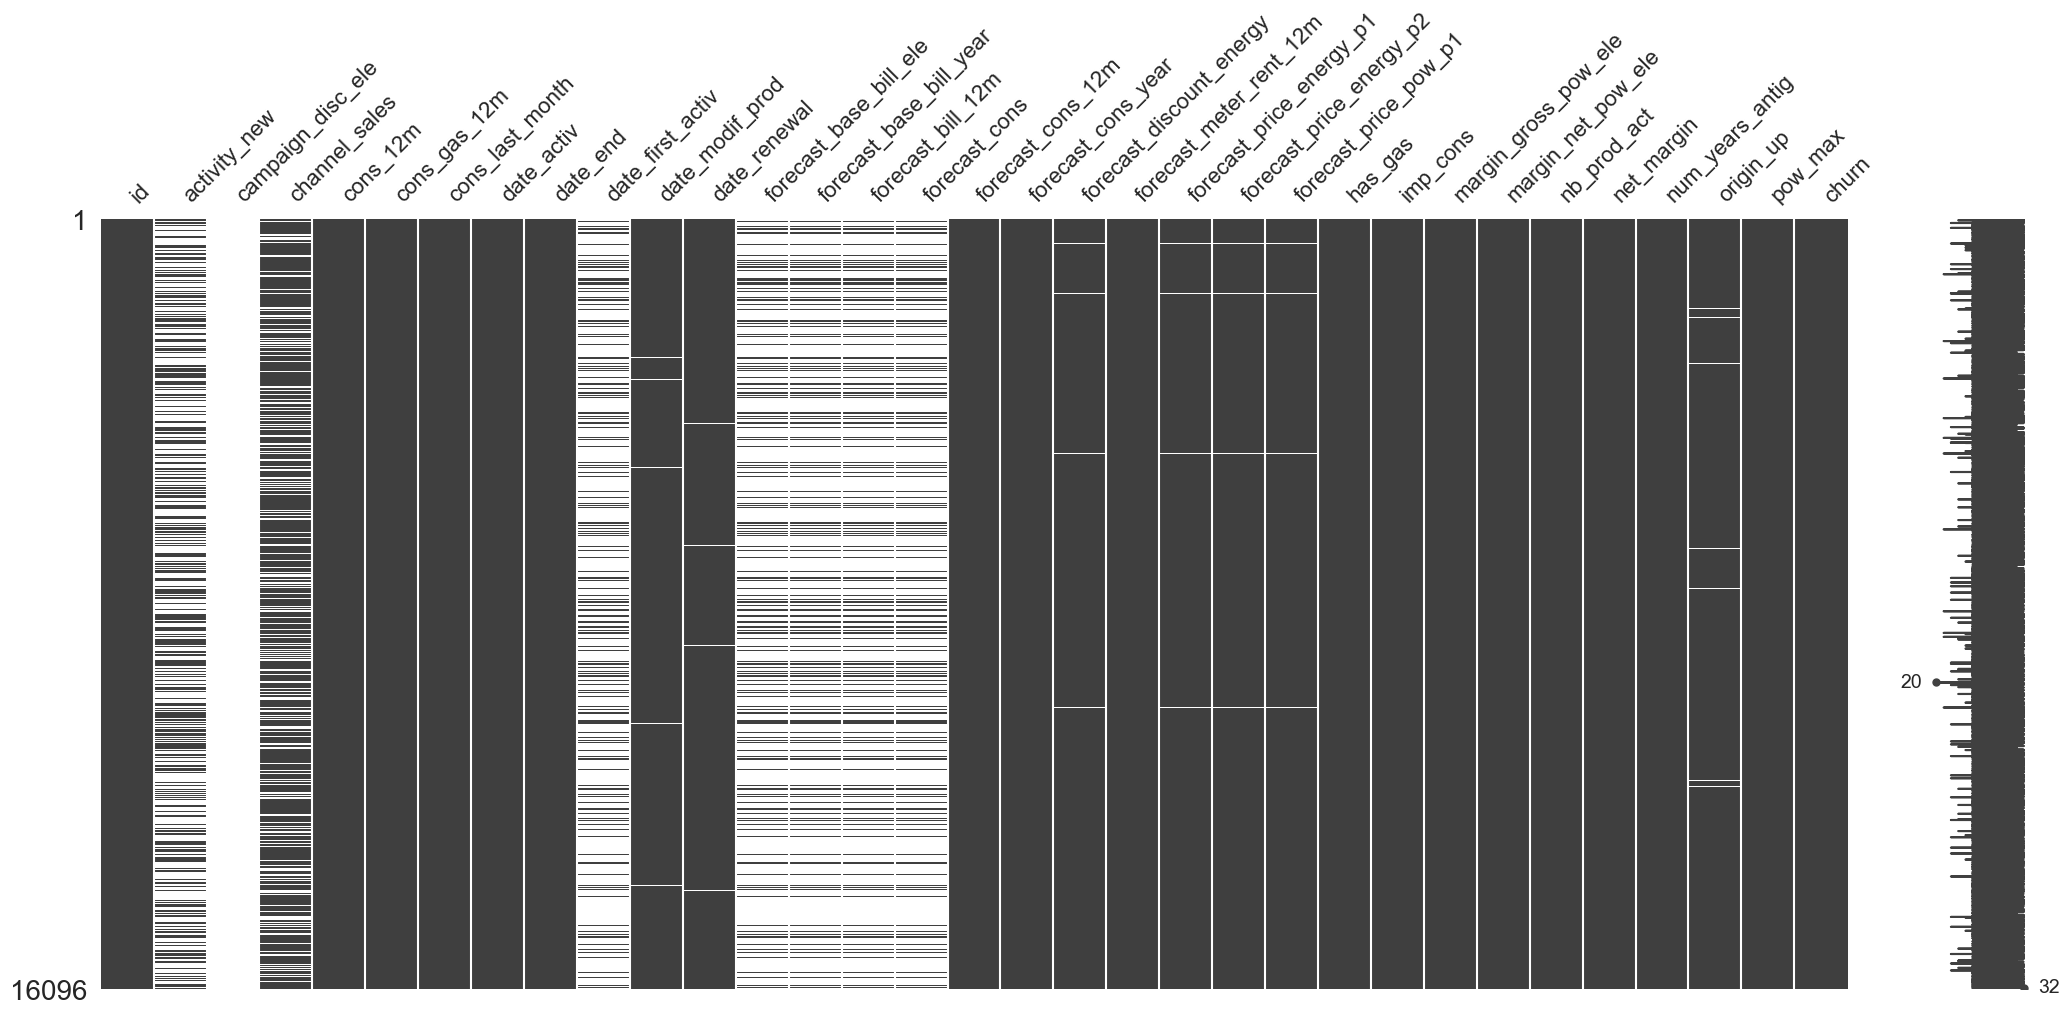

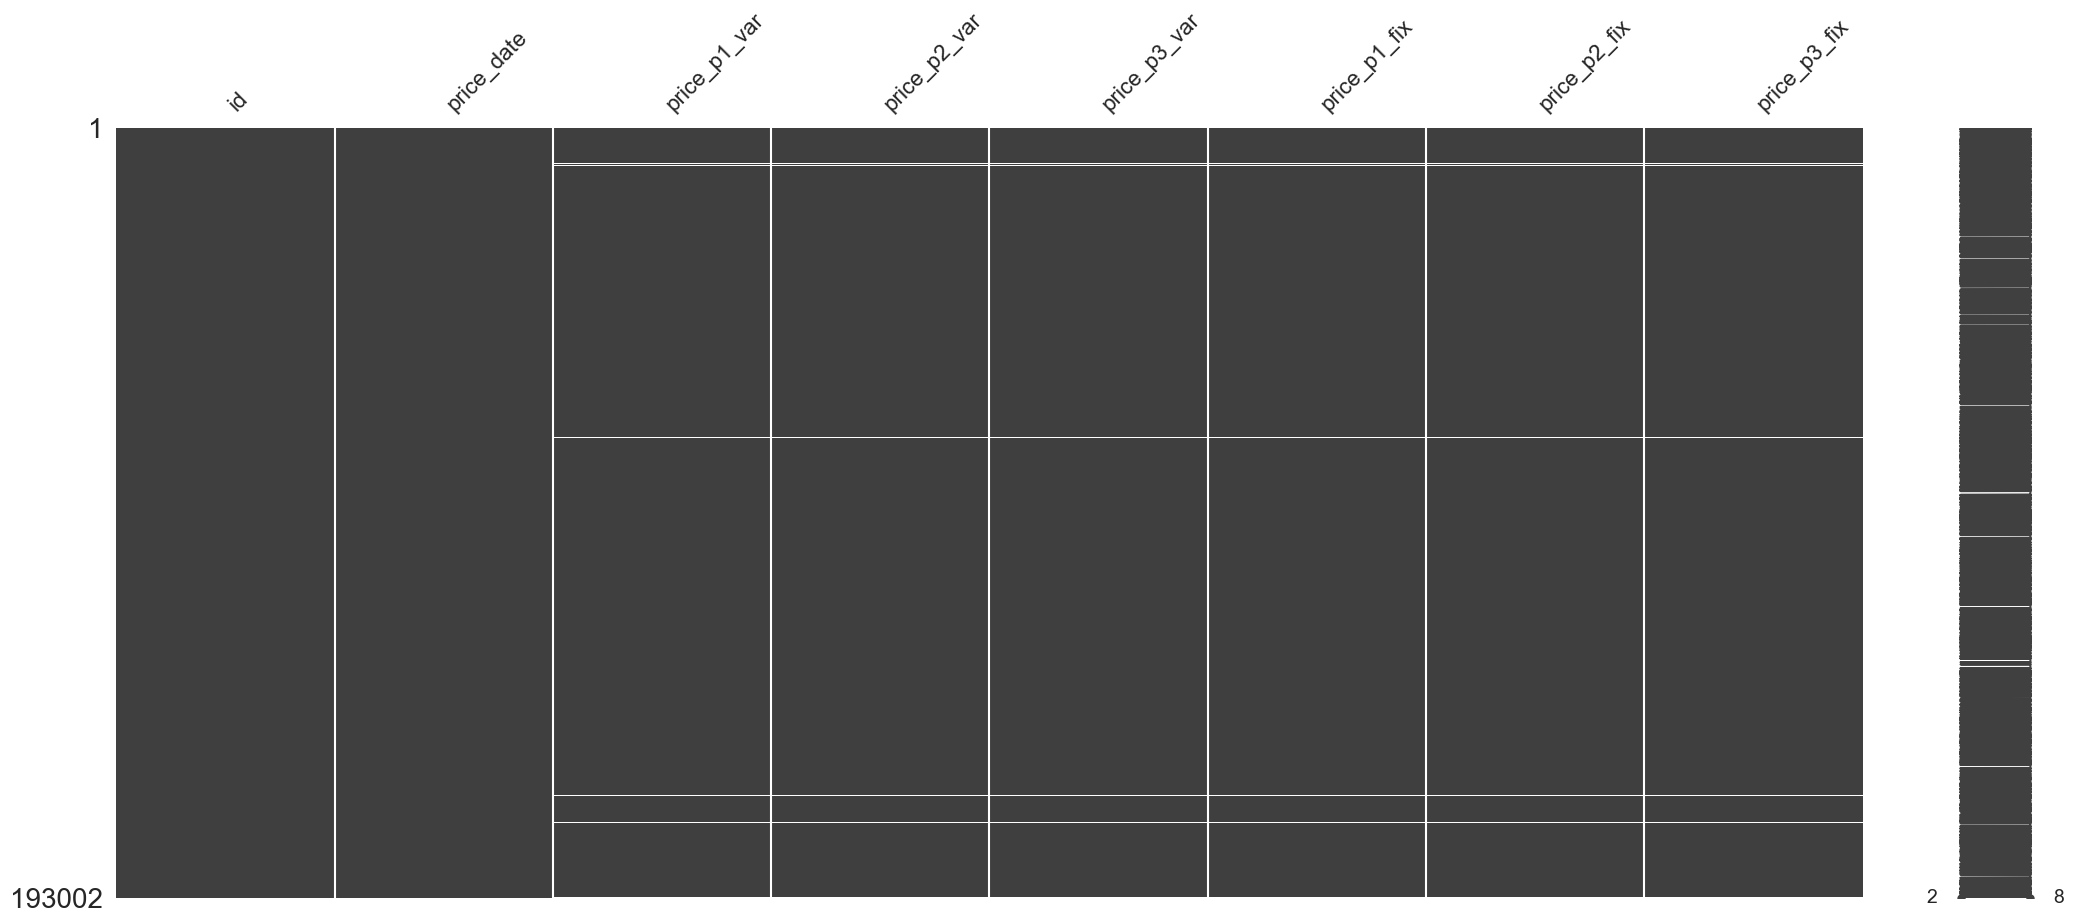

In [41]:
#visualize missing values in our datasets
#to better understand the distribution of missing values
msno.matrix(client_data);
msno.matrix(price);


In [42]:
#calculating the percentage of missing values for each column in the dataset
pd.DataFrame({'Data_Type' : (client_data.isnull().sum()/client_data.shape[0])*100})

Data_Type
id                          0.000000
activity_new               59.300447
campaign_disc_ele         100.000000
channel_sales              26.205268
cons_12m                    0.000000
cons_gas_12m                0.000000
cons_last_month             0.000000
date_activ                  0.000000
date_end                    0.012425
date_first_activ           78.205765
date_modif_prod             0.975398
date_renewal                0.248509
forecast_base_bill_ele     78.205765
forecast_base_bill_year    78.205765
forecast_bill_12m          78.205765
forecast_cons              78.205765
forecast_cons_12m           0.000000
forecast_cons_year          0.000000
forecast_discount_energy    0.782803
forecast_meter_rent_12m     0.000000
forecast_price_energy_p1    0.782803
forecast_price_energy_p2    0.782803
forecast_price_pow_p1       0.782803
has_gas                     0.000000
imp_cons                    0.000000
margin_gross_pow_ele        0.080765
margin_net_pow_ele          0.080765
nb_prod_act                 0.000000
net_margin                  0.093191
num_years_antig             0.000000
origin_up                   0.540507
pow_max                     0.018638
churn                       0.000000

In [45]:
pd.DataFrame({'Data_Type' : (price.isnull().sum()/price.shape[0])*100})

Data_Type
id             0.000000
price_date     0.000000
price_p1_var   0.704138
price_p2_var   0.704138
price_p3_var   0.704138
price_p1_fix   0.704138
price_p2_fix   0.704138
price_p3_fix   0.704138

### 3. Data Visualization

Let's take deeper insight on some features.

#### Churn
About 10% of the of total customers have churned.

In [49]:
# plot_stacked_bars Function:

# Takes a DataFrame (df) and parameters for the plot title, size, rotation of x-tick labels, and legend position.
# It plots a stacked bar chart and annotates each bar with the corresponding values.
# The y-axis is labeled as "Company base (%)".
# annotate_stacked_bars Function:

# Iterates over each bar in the plot, calculates the height (value) of the bar, and adds an annotation.
# Annotations are only added if the value is not zero.

def plot_stacked_bars(client_data, title_, size_ = (18, 10), rot_ = 0, legend_ = 'upper right'):
    '''
    Plot stacked bars with annotations
    '''
    ax = client_data.plot(kind = 'bar',
                stacked = True,
                figsize = size_,
                rot = rot_,
                title = title_)
    # annotate bars
    annotate_stacked_bars(ax, textsize = 14)
    # rename legend
    plt.legend(['Retention', 'Churn'], loc=legend_)
    # labels
    plt.ylabel('Company base(%)')
    plt.show()
    
def annotate_stacked_bars(ax, pad = 0.99, colour = 'white', textsize = 13):
    '''
    Add Value annotations to the bar
    '''
    # Iterate over the plotted rectanges/bars 
    for p in ax.patches:
        # calculate annotation
        value = str(round(p.get_height(), 2))
        # if value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value, ((p.get_x() + p.get_width()/2)*pad - 0.05, (p.get_y() + p.get_height()/2)*pad),
                    color = colour, size = textsize)

In [51]:
#calculating the percentage of churn and not churn

client_total = client_data.groupby(client_data['churn']).count()
client_perc = client_total/client_total.sum()*100
client_perc = client_perc[['id']].transpose()

print(client_perc)

churn          0         1
id     90.090706  9.909294


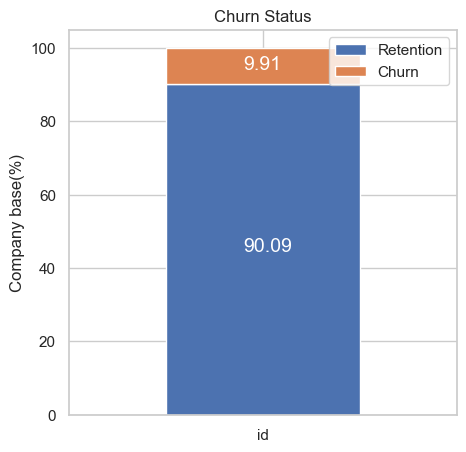

In [53]:
plot_stacked_bars(client_perc, 'Churn Status', (5, 5))

#### SME activity
Display the activity distribution of the companies as well as the various sales channels.

We notice that churn is not specifically related to any SME category in particular.

How will the SME activity influence our predictive model?

Our predictive model is likely to struggle accurately predicting the SME activity due to the large number of categories and low number of companies belonging to each category.

In [57]:
churn_by_activity = client_data.groupby(['activity_new', 'churn'])['id']\
.count()\
.unstack(level = 1)\
.fillna(0)\
.sort_values(by = [0], ascending = False)


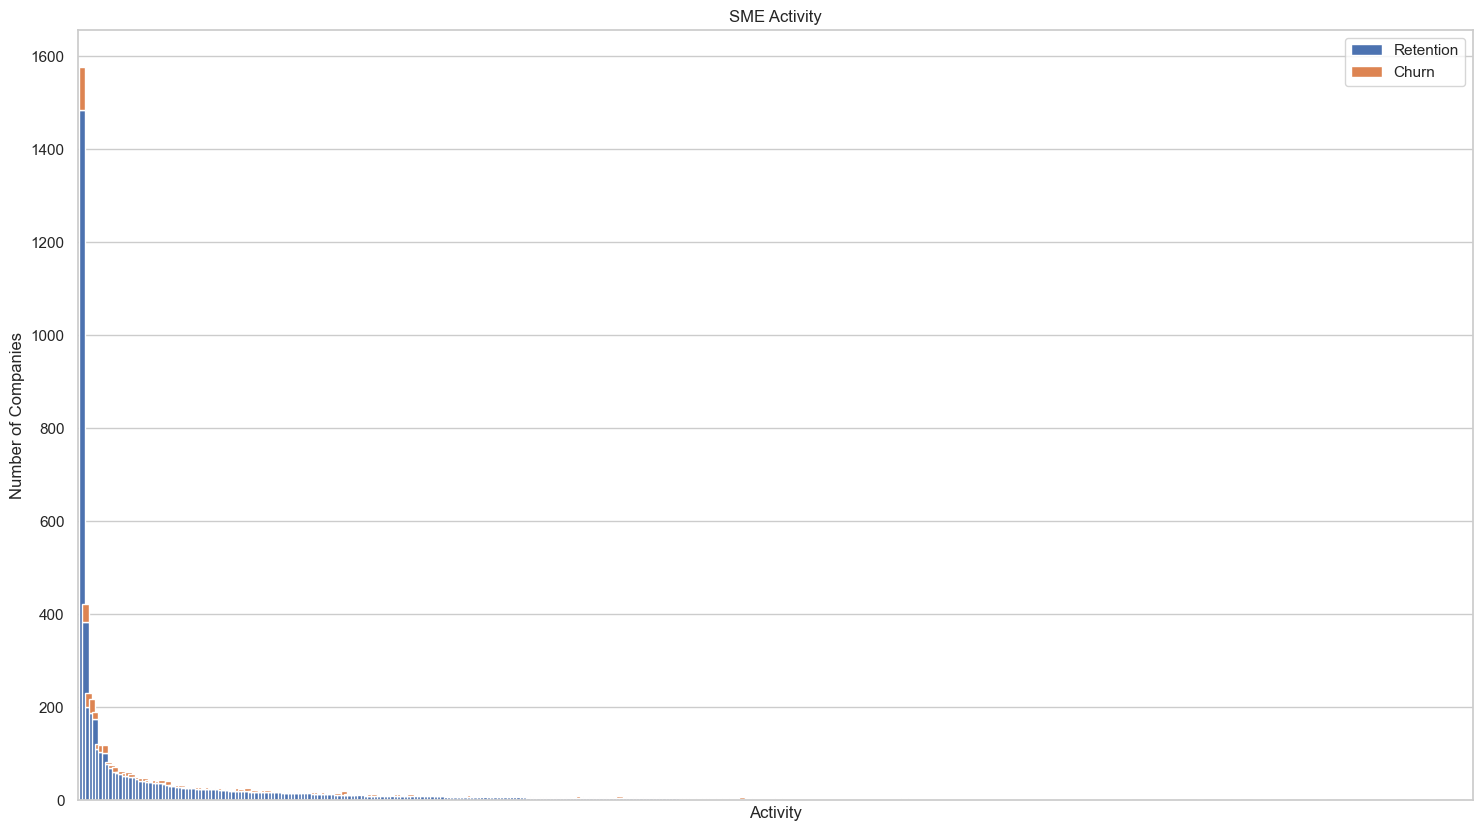

In [59]:
churn_by_activity.plot(kind = 'bar',
                      figsize = (18, 10),
                      width = 2,
                      stacked = True,
                      title = 'SME Activity');
# labels
plt.ylabel('Number of Companies')
plt.xlabel('Activity')
# rename legend
plt.legend(['Retention', 'Churn'], loc = 'upper right')
# Remove the label for the xticks as the categories are encoded and we cant draw any meaning from them yet
plt.xticks([])
plt.show();



In [61]:
# high churn rate by activity
churn_by_activity['total_companies'] = churn_by_activity[0] + churn_by_activity[1]
churn_by_activity['churn_rate'] = churn_by_activity[1]/churn_by_activity['total_companies']
top_churn_rate_by_activity = churn_by_activity\
.sort_values(by = 'churn_rate', ascending = False)[['churn_rate']]\
.head(10).reset_index()


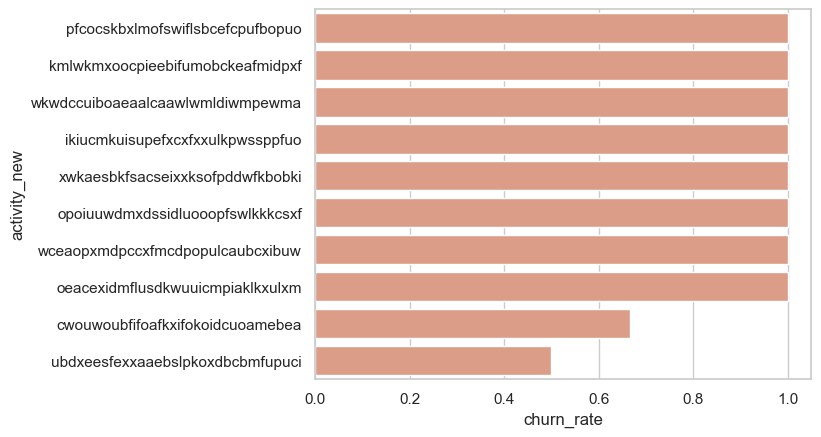

In [63]:
sns.barplot(data = top_churn_rate_by_activity, x = 'churn_rate', y = 'activity_new', color = '#E9967A');
plt.show();


#### Sales Channel
There are 7 unique sales channel, but the column has 26.205268% missing values.<br>
However, the sales channel seems to be an important feature when predicting the probability of a user to churn.<br>
We will plot the categories, despite the missing values.

In [68]:
client_data['channel_sales'].value_counts()
#display of unique values in the column

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    7377
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [70]:
#analyzing churn by sales channel
#calculating the percentage of churned and non-churned customers for each channel
churn_by_channel = client_data.groupby(['channel_sales', 'churn'])['id'].count().unstack(level = 1).fillna(0).sort_values(by = [0])
total = churn_by_channel[0] + churn_by_channel[1]
churn_by_channel[0] = churn_by_channel[0]/total*100
churn_by_channel[1] = churn_by_channel[1]/total*100

churn_by_channel = churn_by_channel.sort_values(by = [0], ascending = False)



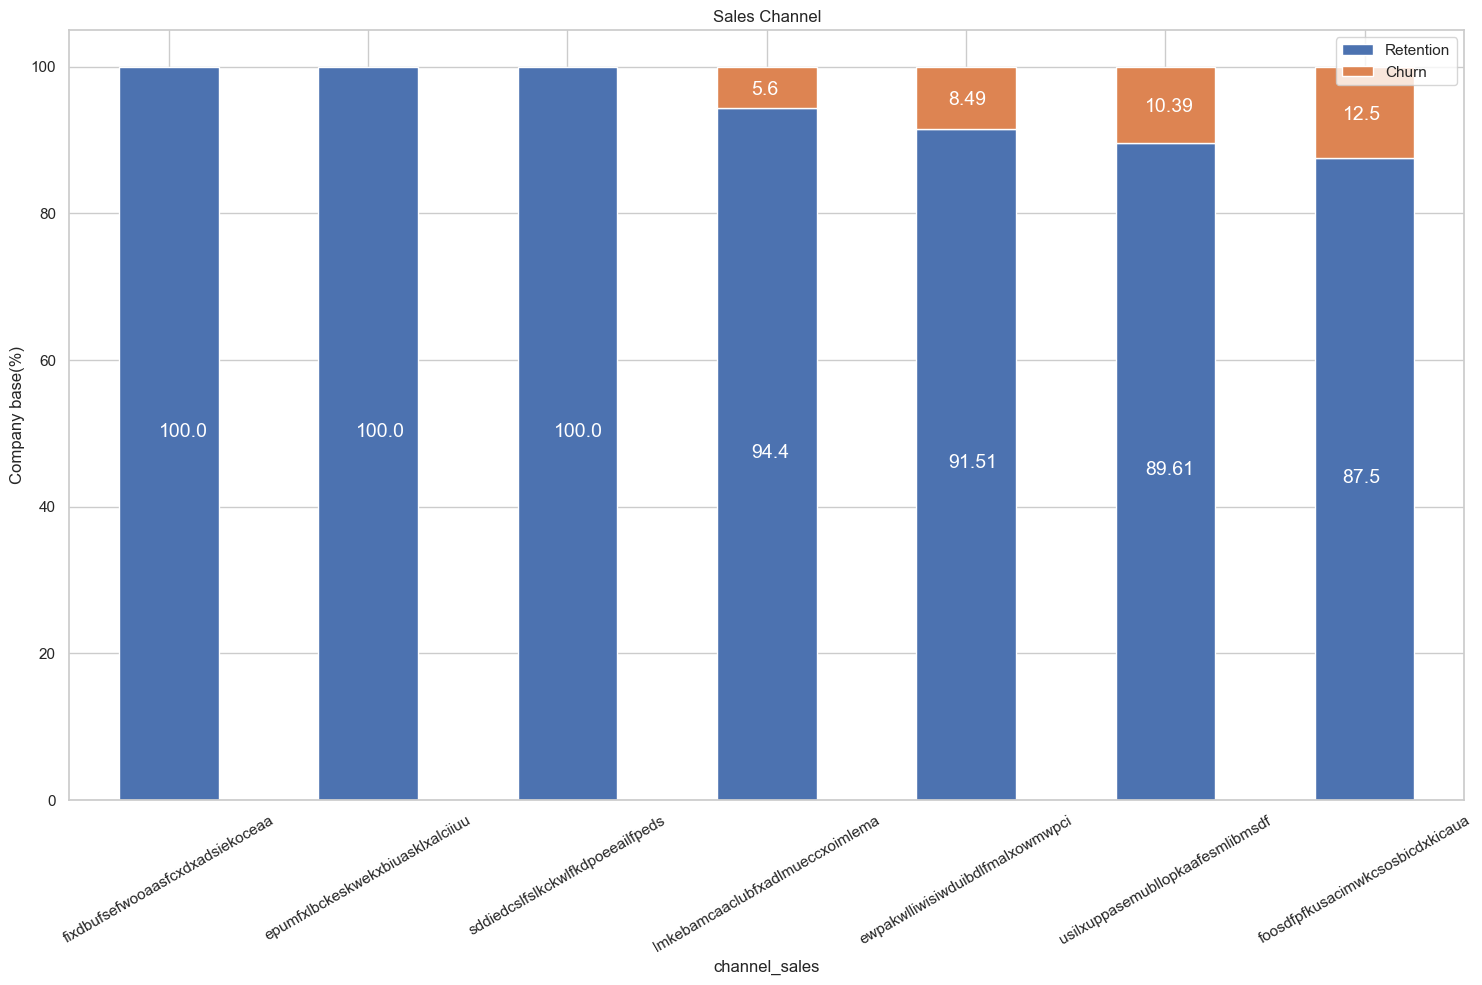

In [72]:
#plotting the percentage of churned and non-churned customers for each channel
plot_stacked_bars(churn_by_channel, 'Sales Channel', rot_ = 30)


In [74]:
#adding a new column named total to the churn_by_channel DataFrame
#which contains the total number of customers (both churned and non-churned) for each sales channel
churn_by_channel['total'] = total


#renaming columns 0 and 1 to non-churned and churned respectively
churn_by_channel.columns = ['non_churned_percentage', 'churned_percentage', 'total']


print(churn_by_channel)

                                  non_churned_percentage  churned_percentage  \
channel_sales                                                                  
fixdbufsefwooaasfcxdxadsiekoceaa              100.000000            0.000000   
epumfxlbckeskwekxbiuasklxalciiuu              100.000000            0.000000   
sddiedcslfslkckwlfkdpoeeailfpeds              100.000000            0.000000   
lmkebamcaaclubfxadlmueccxoimlema               94.404245            5.595755   
ewpakwlliwisiwduibdlfmalxowmwpci               91.511387            8.488613   
usilxuppasemubllopkaafesmlibmsdf               89.612188           10.387812   
foosdfpfkusacimwkcsosbicdxkicaua               87.501694           12.498306   

                                   total  
channel_sales                             
fixdbufsefwooaasfcxdxadsiekoceaa     2.0  
epumfxlbckeskwekxbiuasklxalciiuu     4.0  
sddiedcslfslkckwlfkdpoeeailfpeds    12.0  
lmkebamcaaclubfxadlmueccxoimlema  2073.0  
ewpakwlliwisiwduibdlf

#### Origin Up

In [78]:
client_data["origin_up"].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7825
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3664
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [82]:
#analyzing churn by subscription/origin up


churn_by_origin = client_data.groupby(['origin_up', 'churn'])['id'].count().unstack(level = 1).fillna(0).sort_values(by = [0])
total = churn_by_origin[0] + churn_by_origin[1]
churn_by_origin[0] = churn_by_origin[0]/total*100
churn_by_origin[1] = churn_by_origin[1]/total*100

churn_by_origin = churn_by_origin.sort_values(by = [0], ascending = False)


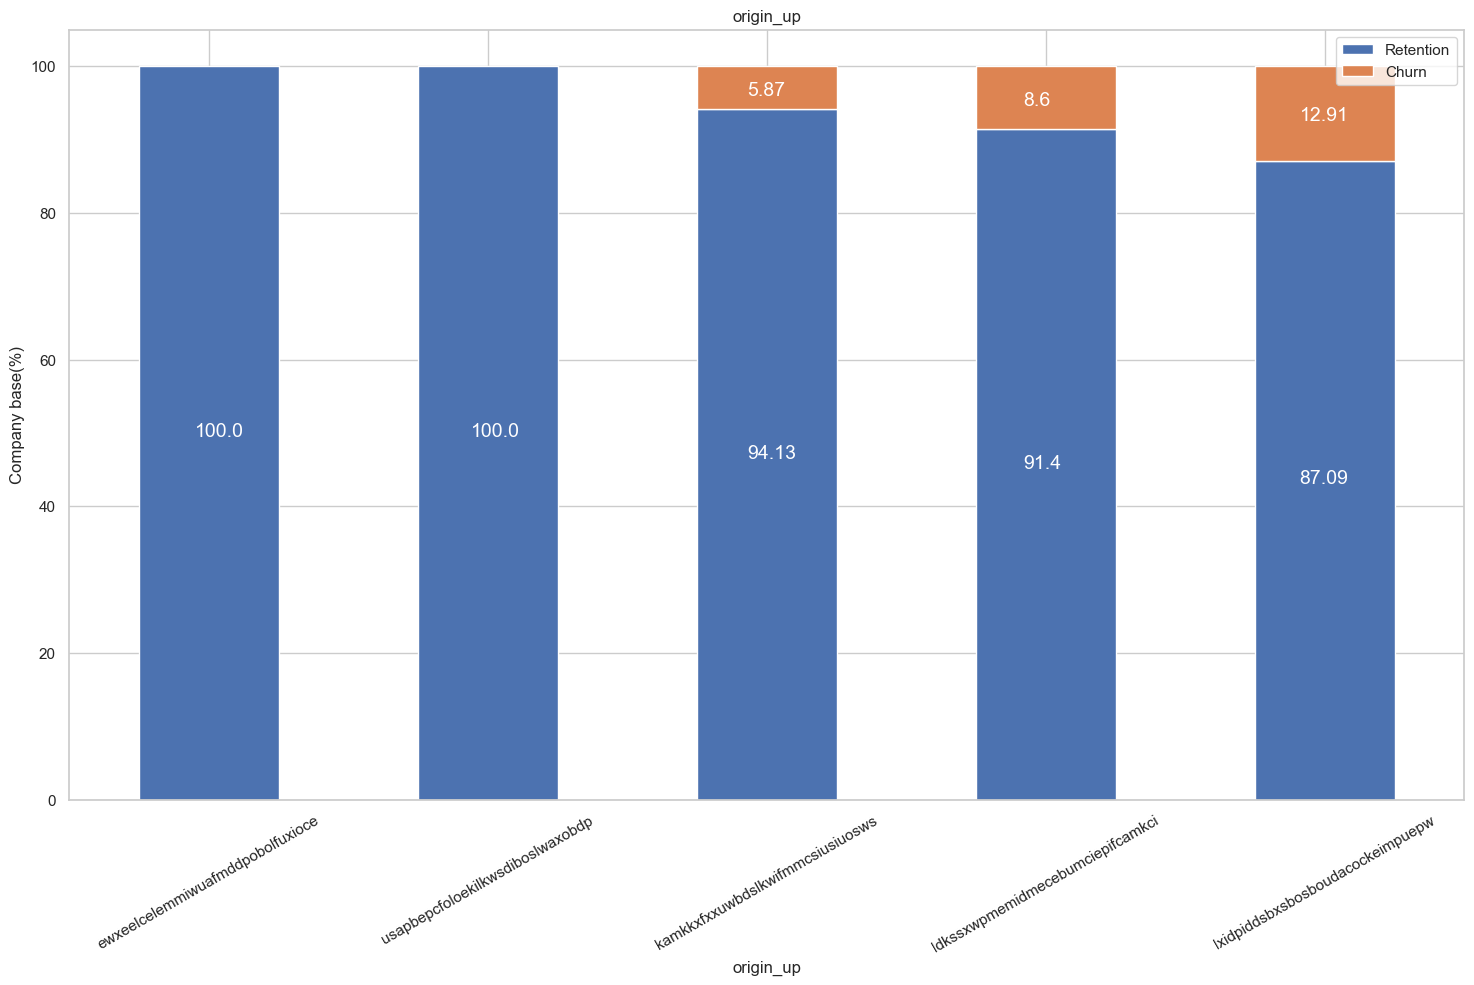

In [84]:
#plotting the percentage of churned and non-churned customers for each channel
plot_stacked_bars(churn_by_origin, 'origin_up', rot_ = 30)


lxidpiddsbxsbosboudacockeimpuepw has highest customer churn.

#### Consumption
Let's see the distribution of the consumption over the year and over the months

We can clearly see in here that the consumption data is highly skewed to the right, presenting a very long right-tail towards the higher values of the distribution. 

In [89]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'has_gas', 'imp_cons', 'churn']]


In [91]:
def plot_distribution(dataframe, column, ax, bins_ = 50):
    '''
    Plot variable distribution in a stcked histogram of churned or related company
    '''
    # create a temporal dataframe with the data to be plotted
    temp = pd.DataFrame({'Retention': dataframe[dataframe['churn'] == 0][column],
                        'Churn': dataframe[dataframe['churn'] == 1][column]})
    # plot the histogram
    temp[['Retention', 'Churn']].plot(kind = 'hist', bins = bins_, ax = ax, stacked = True)
    # X-axis label
    ax.set_xlabel(column)
    # change the x-axis to the plain style
    ax.ticklabel_format(style = 'plain', axis = 'x')

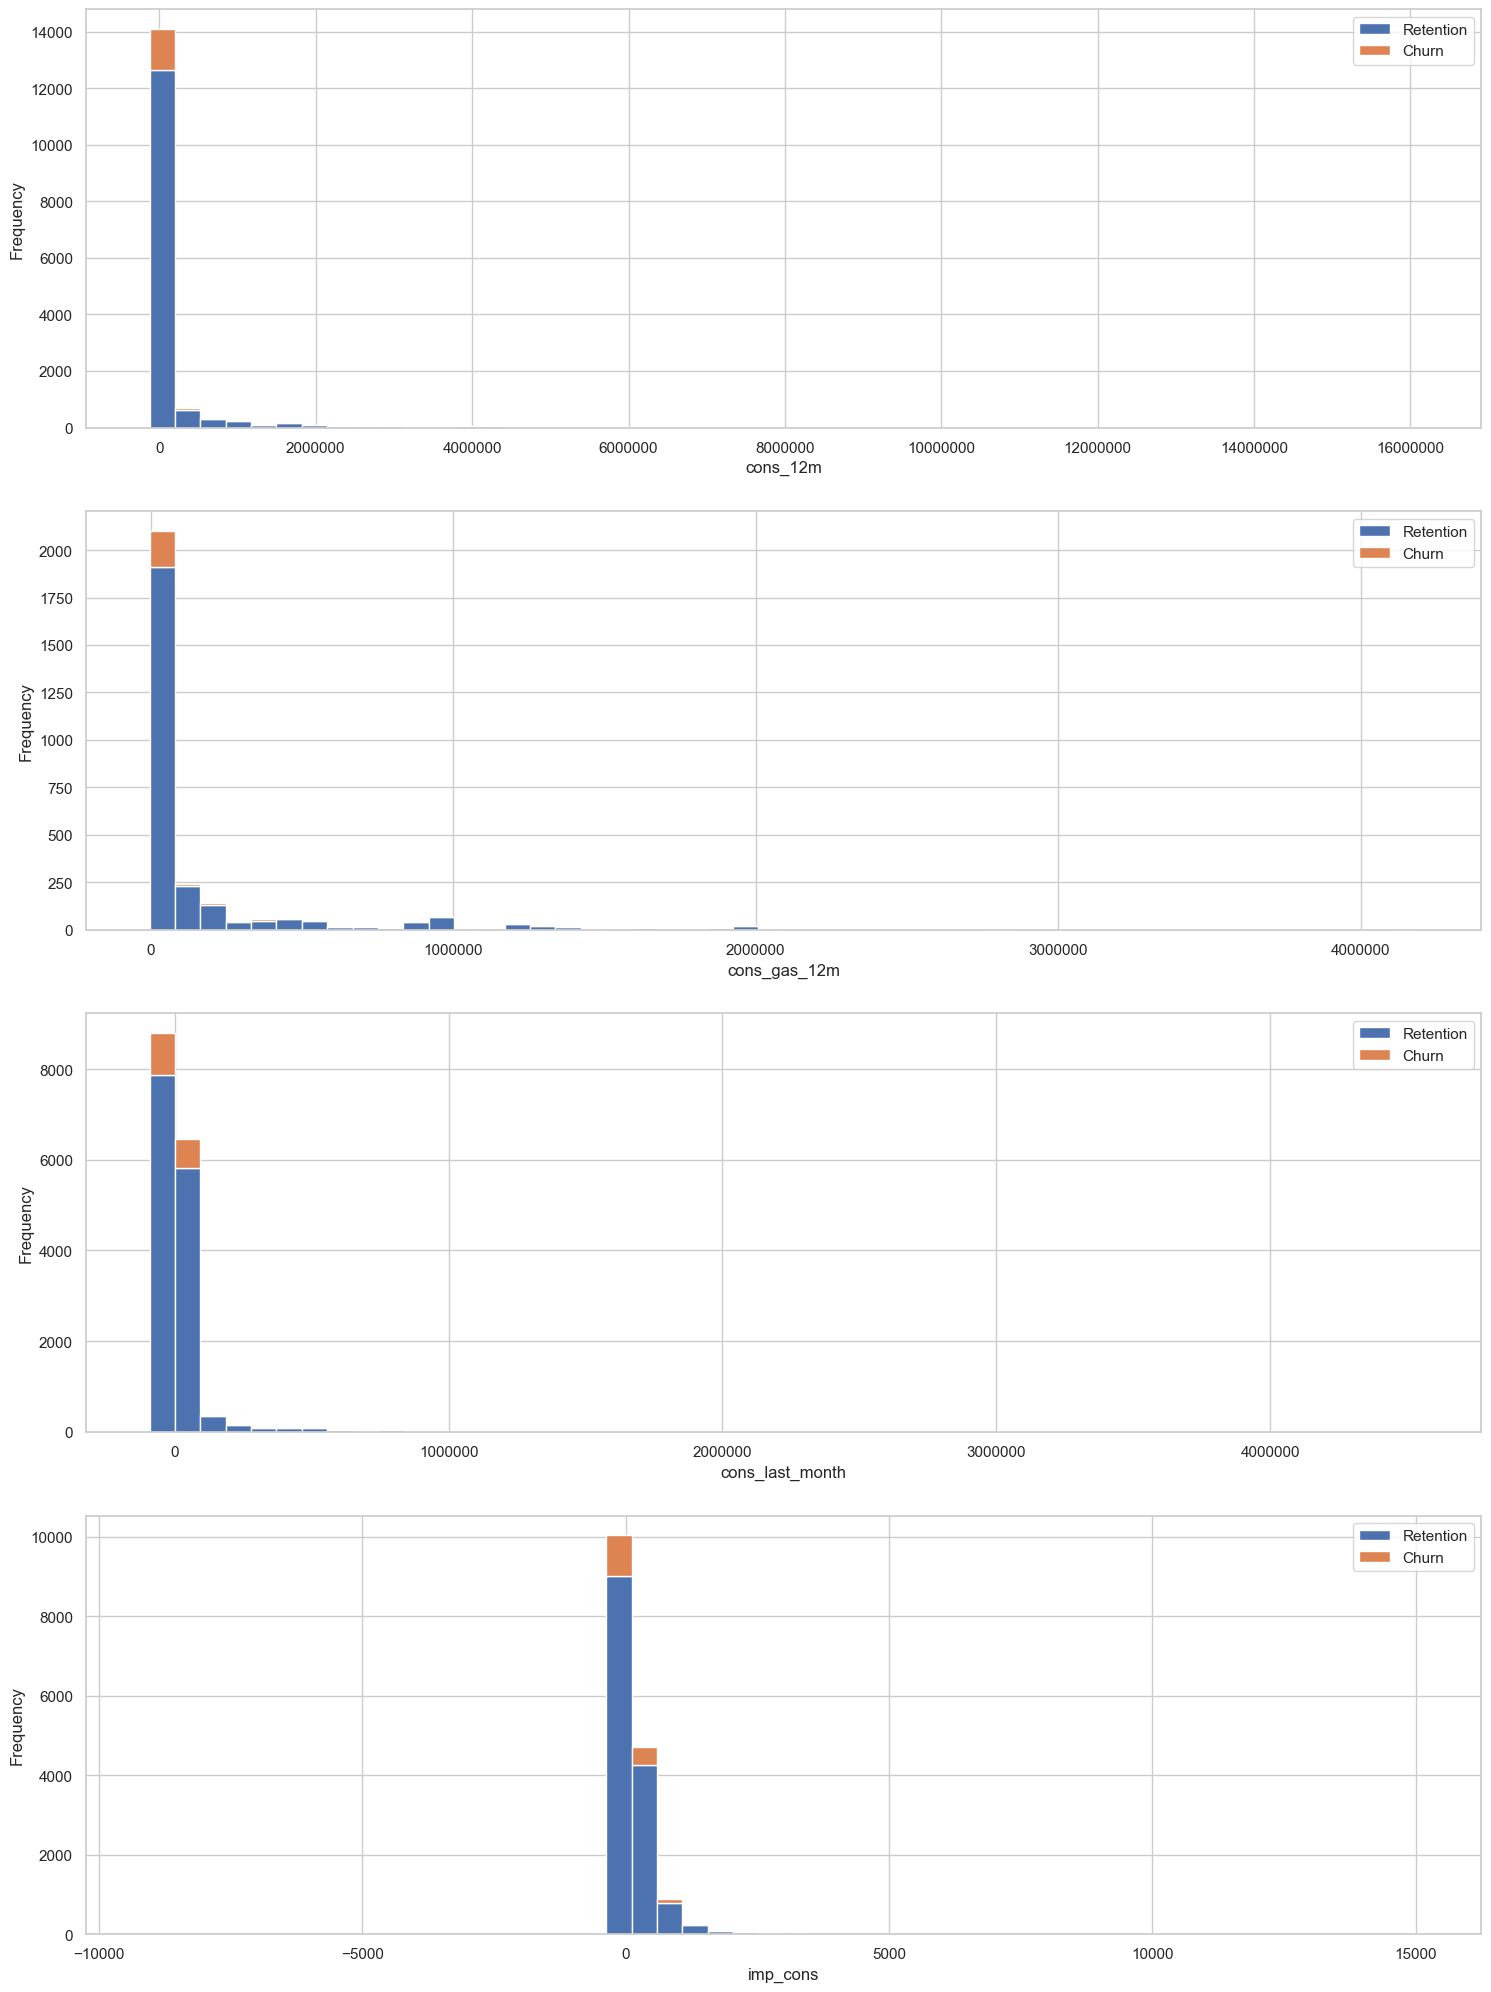

In [93]:
#visualizing the distribution of various consumption-related metrics
fig, axs = plt.subplots(nrows = 4, figsize = (18, 25))
# plot histogram 

#displays the distribution of the cons_12m column
plot_distribution(client_data, 'cons_12m', ax = axs[0])

# shows the distribution of the cons_gas_12m column, but only for clients who have a gas contract (has_gas == 't')
plot_distribution(client_data[client_data['has_gas'] == 't'], 'cons_gas_12m', ax = axs[1])

plot_distribution(client_data, 'cons_last_month', ax = axs[2])
plot_distribution(client_data, 'imp_cons', ax = axs[3])


#### Dates
We look at some features over time. 
First, we convert the date columns to the datetime datatype. 



In [101]:
client_data['date_activ'] = pd.to_datetime(client_data['date_activ'])
client_data['date_end'] = pd.to_datetime(client_data['date_end'])
client_data['date_first_activ'] = pd.to_datetime(client_data['date_first_activ'])
client_data['date_modif_prod'] = pd.to_datetime(client_data['date_modif_prod'])
client_data['date_renewal'] = pd.to_datetime(client_data['date_renewal'])

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_dates(dataframe, column, fontsize_=12):

    # Plot monthly churn and retention distribution.
    
    # Parameters:
    # - dataframe: DataFrame containing the data.
    # - column: Date column to group by month.
    # - fontsize_: Font size for x-axis labels.
                          
    # Group by month and churn status
    temp = dataframe\
        .groupby([pd.Grouper(key=column, freq='M'), 'churn'])['id']\
        .count()\
        .unstack(level=1)\
        .fillna(0)

    # Plot stacked bar chart
    ax = temp.plot(kind='bar', stacked=True, figsize=(18, 10), rot=0)

    # Change x-axis labels to formatted month names
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))

    # Adjust x-axis label size
    plt.xticks(fontsize = fontsize_)

    # Rename y-axis
    plt.ylabel('Number of companies')

    # Rename legend
    plt.legend(['Retention', 'Churn'], loc='upper right')
    
    plt.title('Monthly Churn and Retention Distribution')  # Optional title
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


def line_format(label):
    '''
    Convert time label to a more readable format for plotting.
    
    Parameters:
    - label: Timestamp to format.
    
    Returns:
    - Formatted string representing the month and year.
    '''
    month = label.month_name()[:1] 
    if label.month == 'January' :
        month += f'\n{label.year}'
    return month


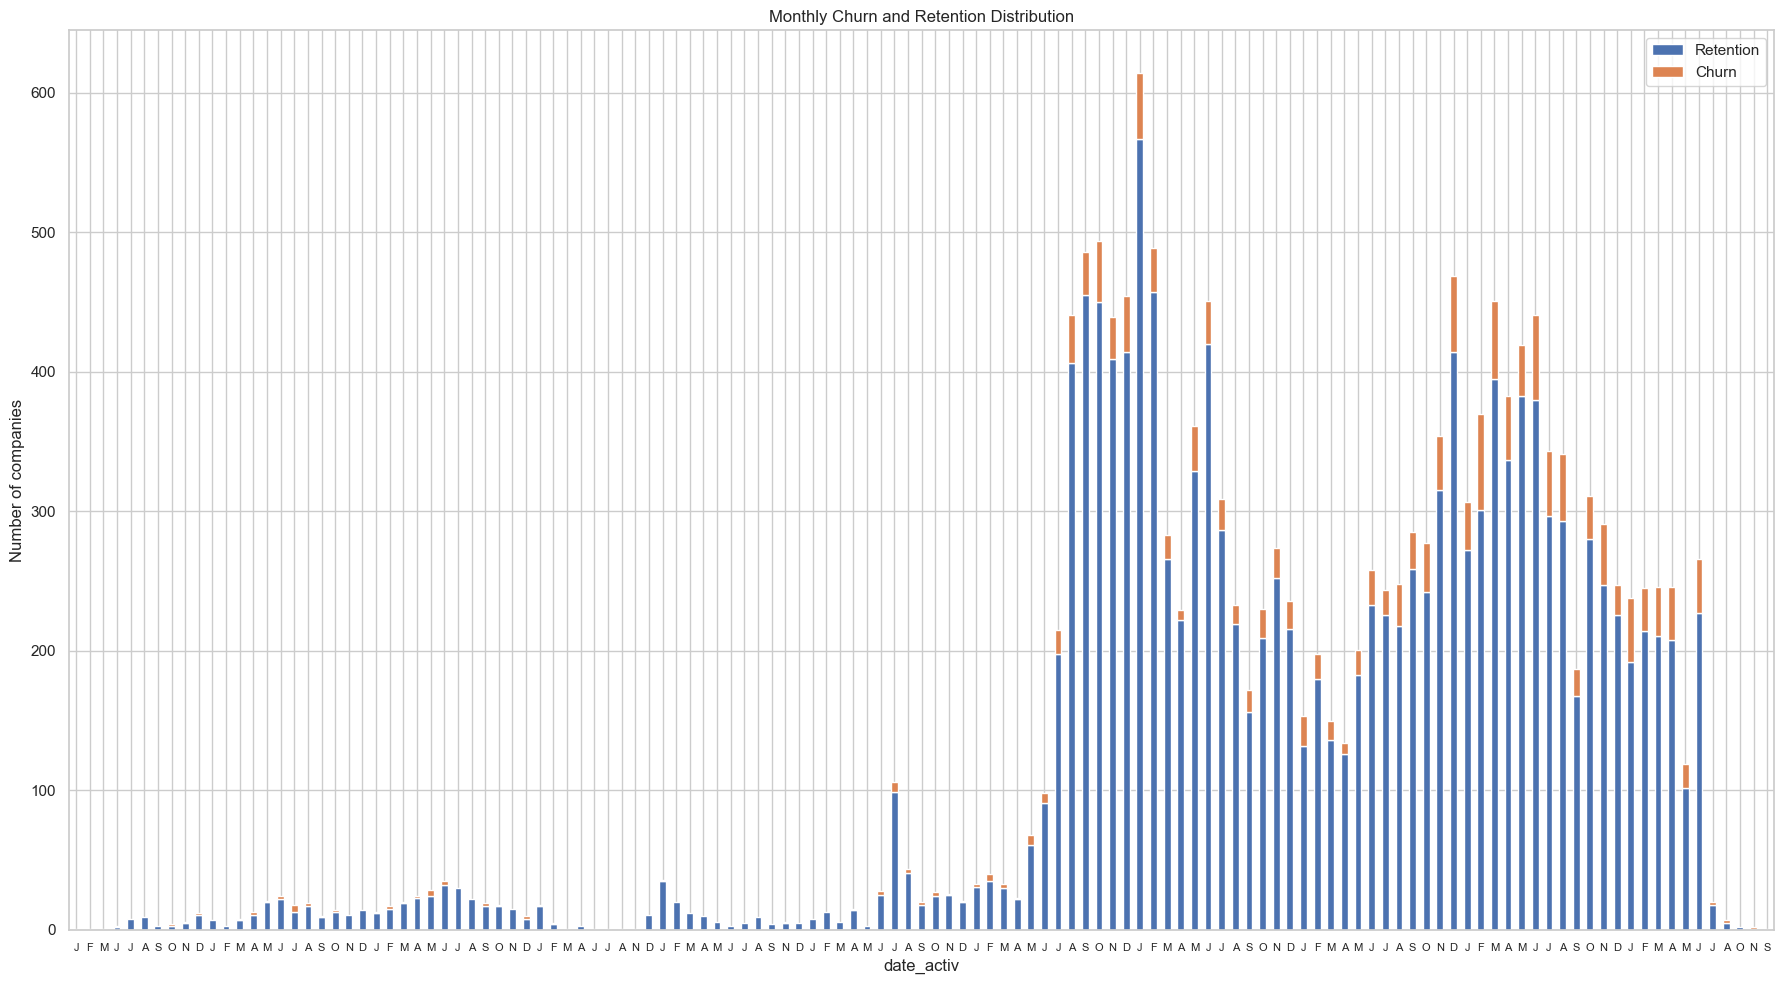

In [105]:
plot_dates(client_data,'date_activ', fontsize_ = 8);

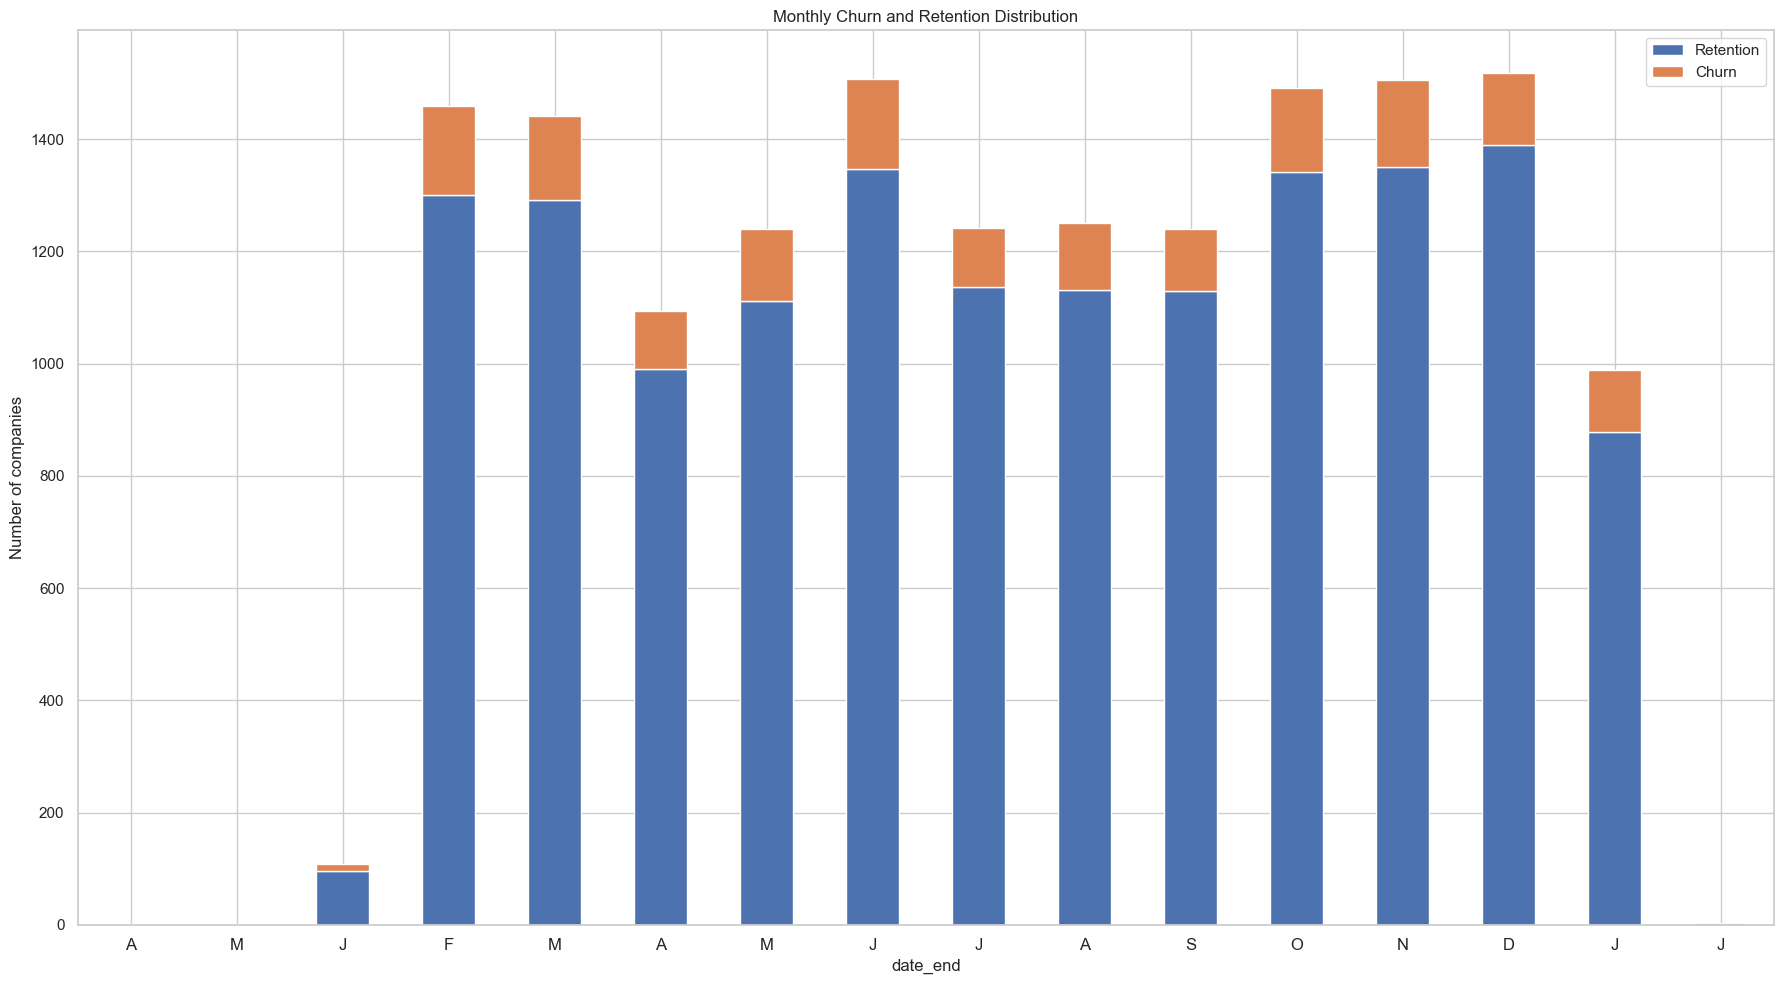

In [107]:
plot_dates(client_data,'date_end');

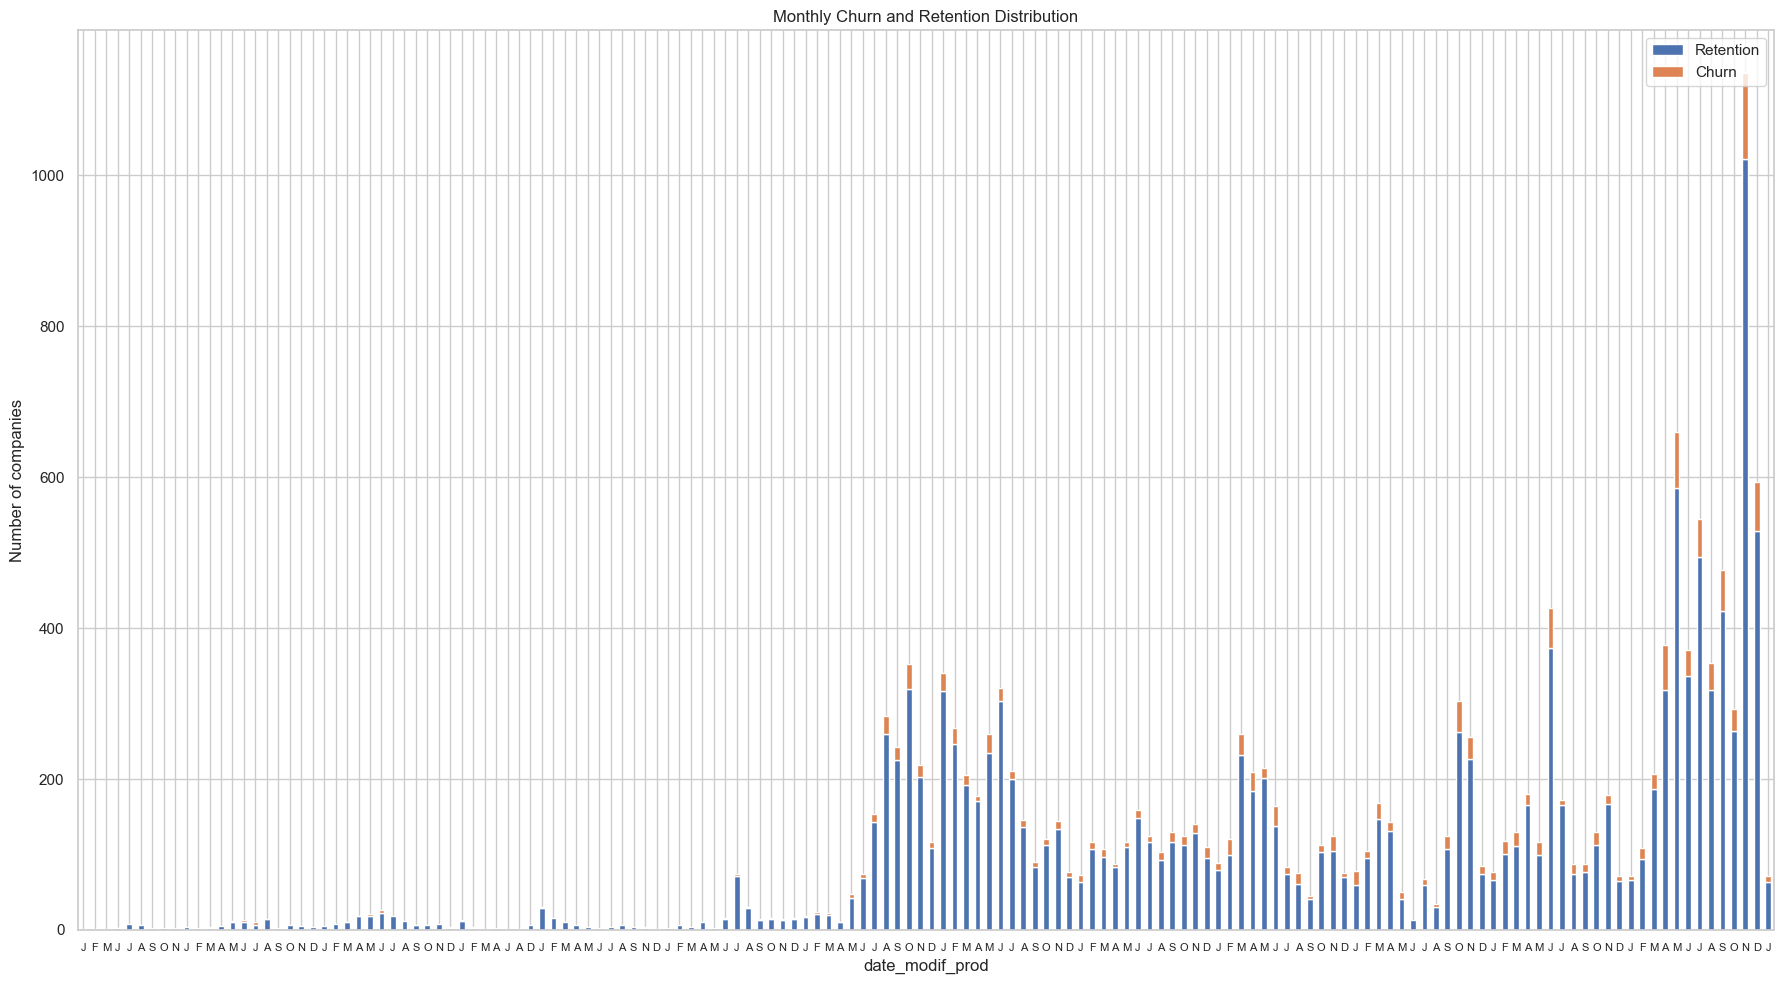

In [109]:
plot_dates(client_data, 'date_modif_prod', fontsize_ = 8)

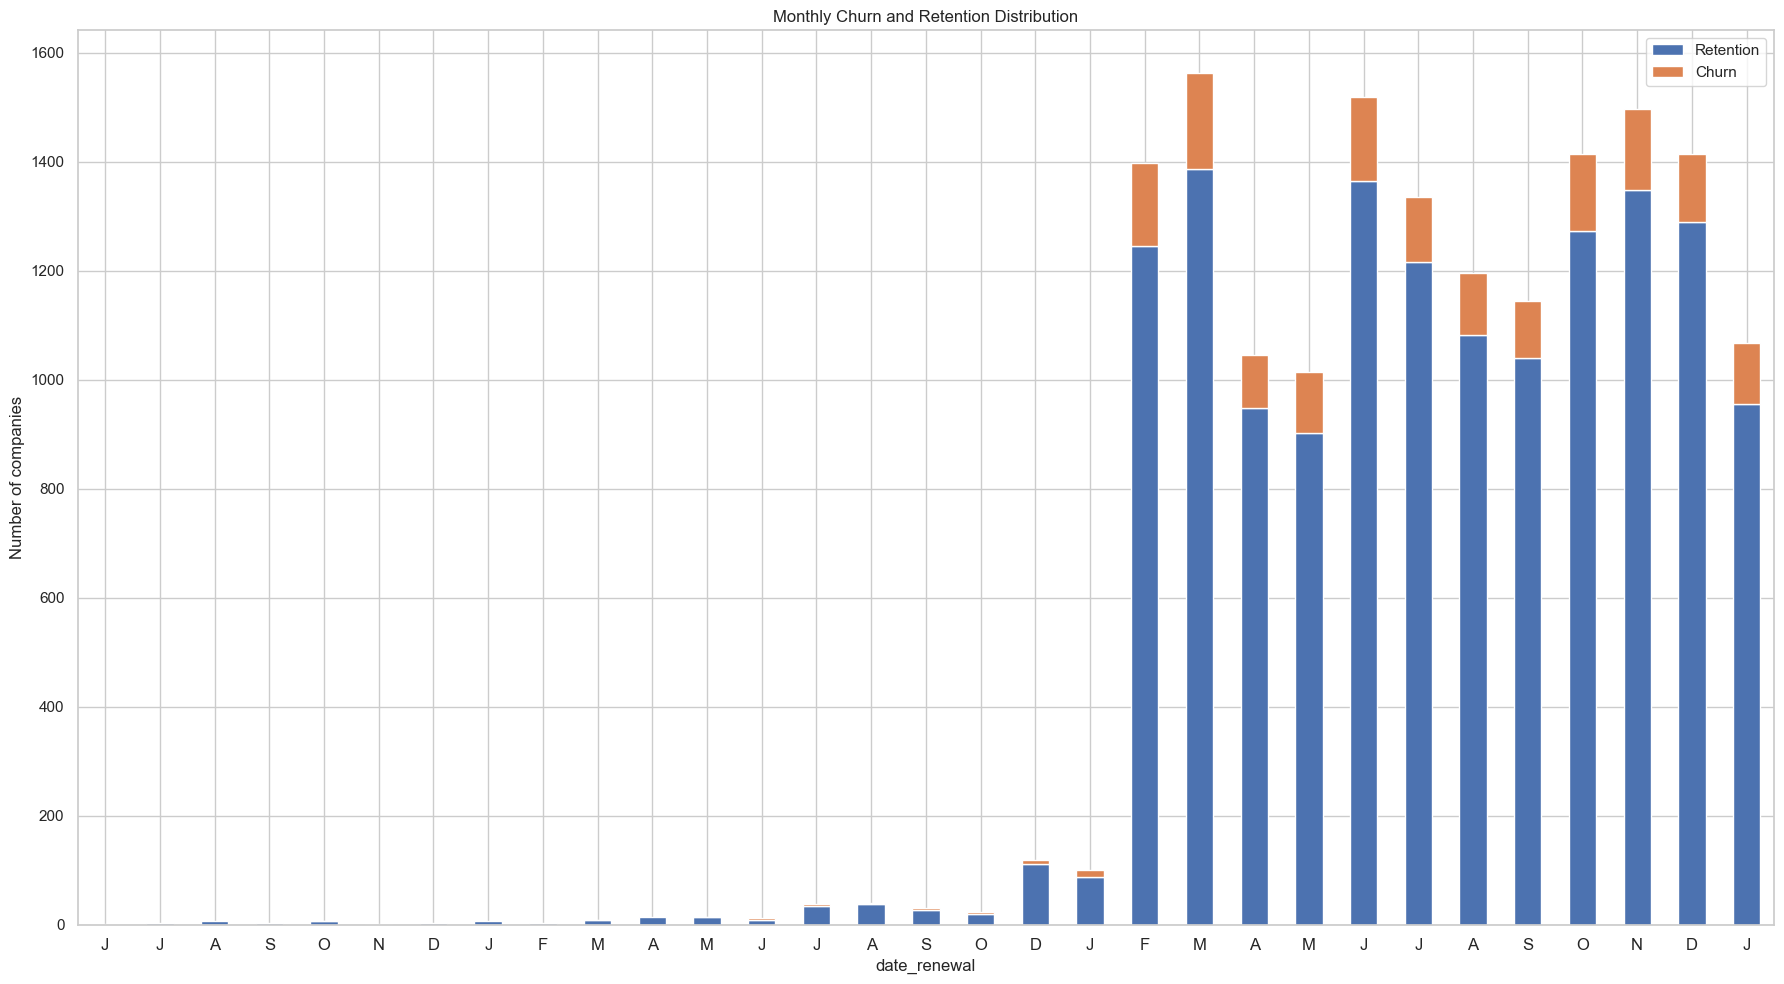

In [111]:
plot_dates(client_data, 'date_renewal')

#### Forecast
Similar to the consumption plots, we can observe that a lot of the variables are highly skewed to the right, creating a very long tail on the higher values

We will make some transformations to correct for this skewness.

In [114]:
# creates a list of column names from the client DataFrame.
# The condition checks if the column name:
# Starts with the string 'forecast'.
# Is exactly equal to 'id'.
# Is exactly equal to 'churn'.
temp = client_data[[c for c in client_data if (c.startswith('forecast')) | (c == 'id') | (c == 'churn')]]

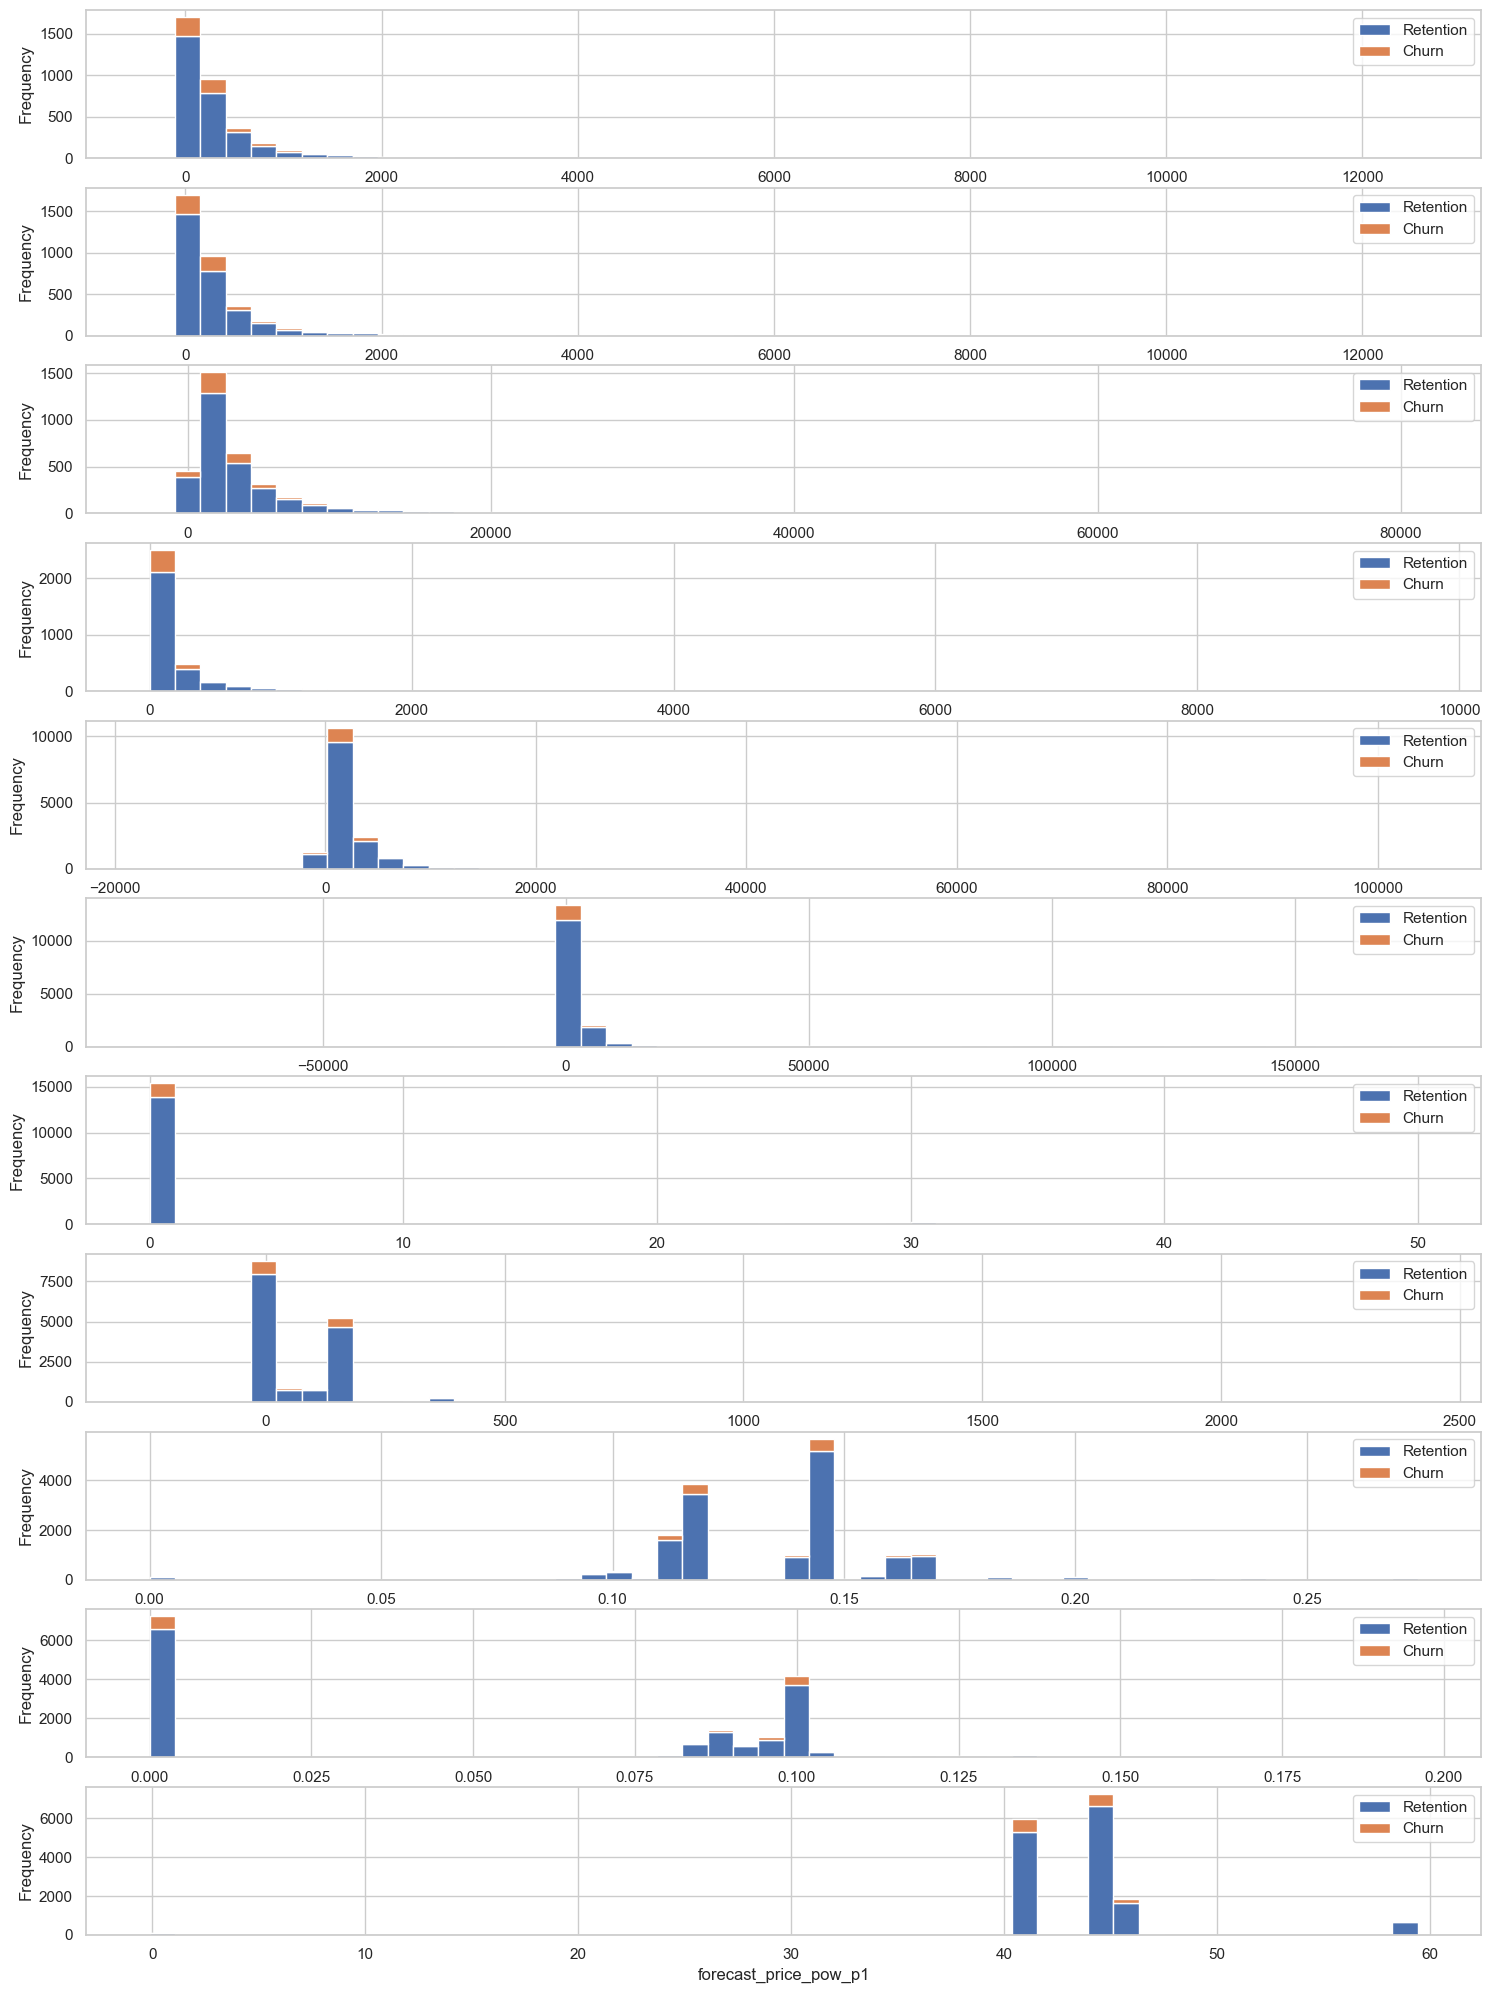

In [116]:
fig, axs = plt.subplots(nrows = 11, figsize = (18, 25))

for idx, c in enumerate(temp.columns[temp.columns.map(lambda x: x.startswith('forecast'))]):
    plot_distribution(temp, c, ax = axs[idx])

### Contract Types

In [119]:
#analyze the churn rates based on whether clients have gas contracts.
temp = client_data.groupby(['has_gas', 'churn'])['id'].count()
temp2 = temp.groupby(level = 0).apply(lambda x: np.round(x/x.sum(), 2)).unstack(level = 1)

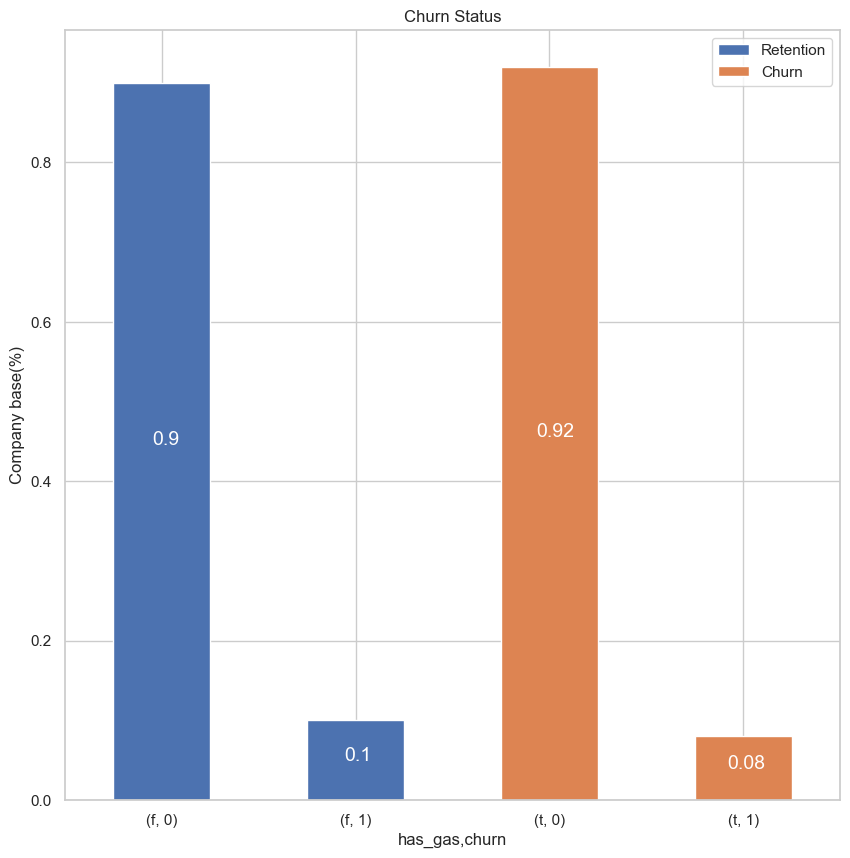

In [121]:
plot_stacked_bars(temp2, 'Churn Status', (10, 10))

#### Margins

Margin seems right skewed as well with a few outliers as well.

In [124]:
margin = client_data[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'churn']]

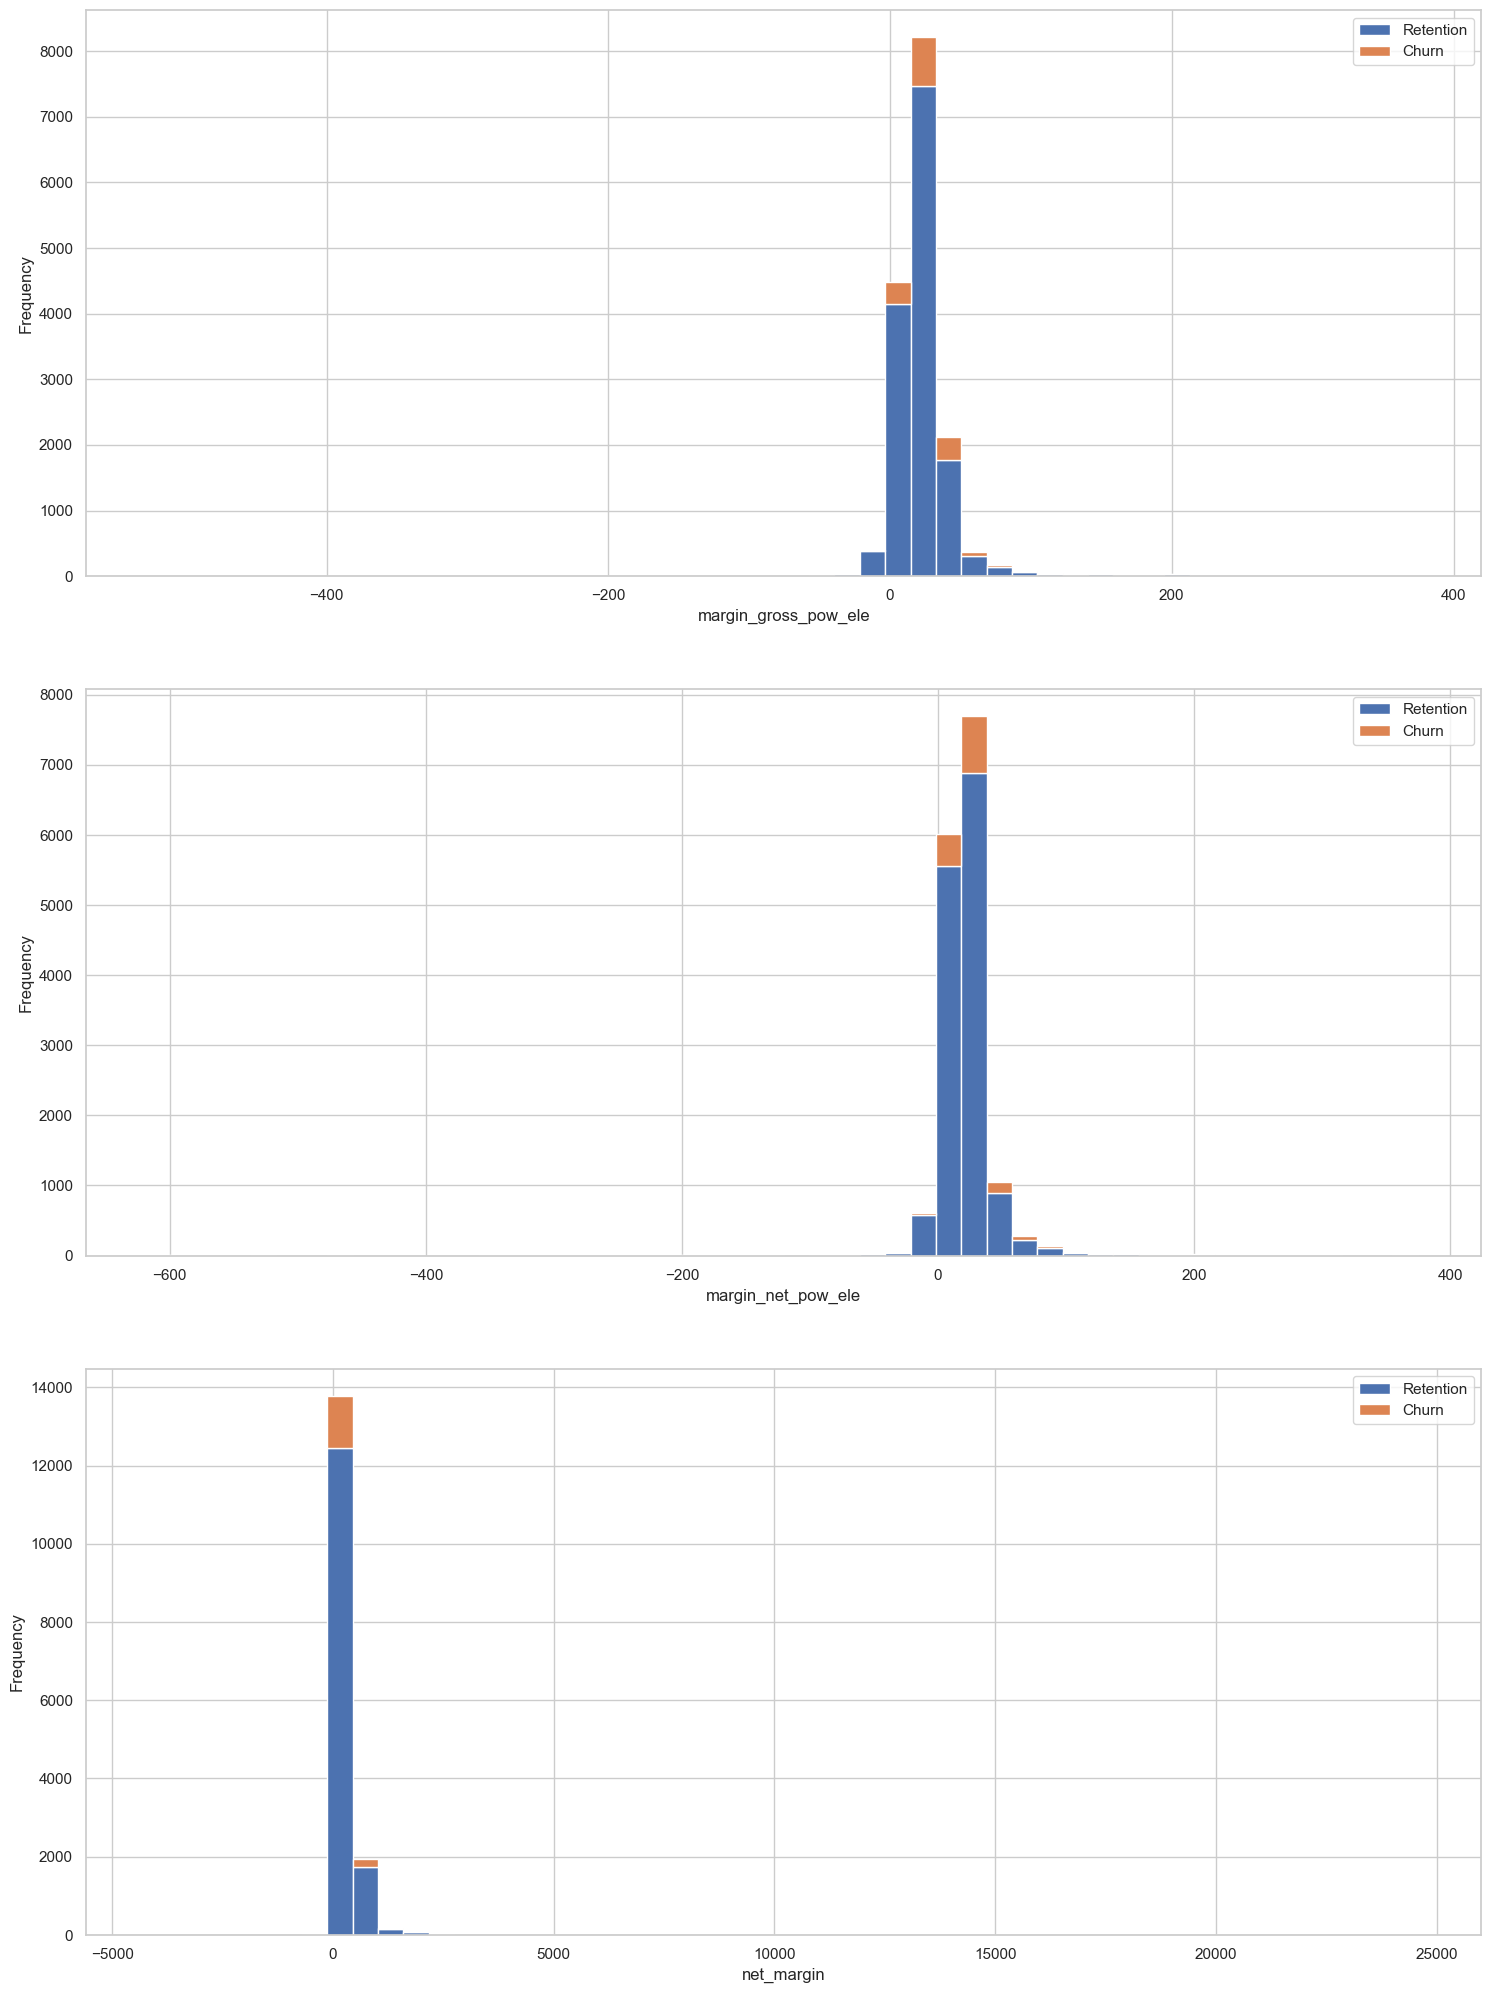

In [126]:
#creating a figure with three subplots, each displaying the distribution of different margin-related metrics
fig, axs = plt.subplots(nrows = 3, figsize = (18, 25))
plot_distribution(margin, 'margin_gross_pow_ele', axs[0])
plot_distribution(margin, 'margin_net_pow_ele', axs[1])
plot_distribution(margin, 'net_margin', axs[2])

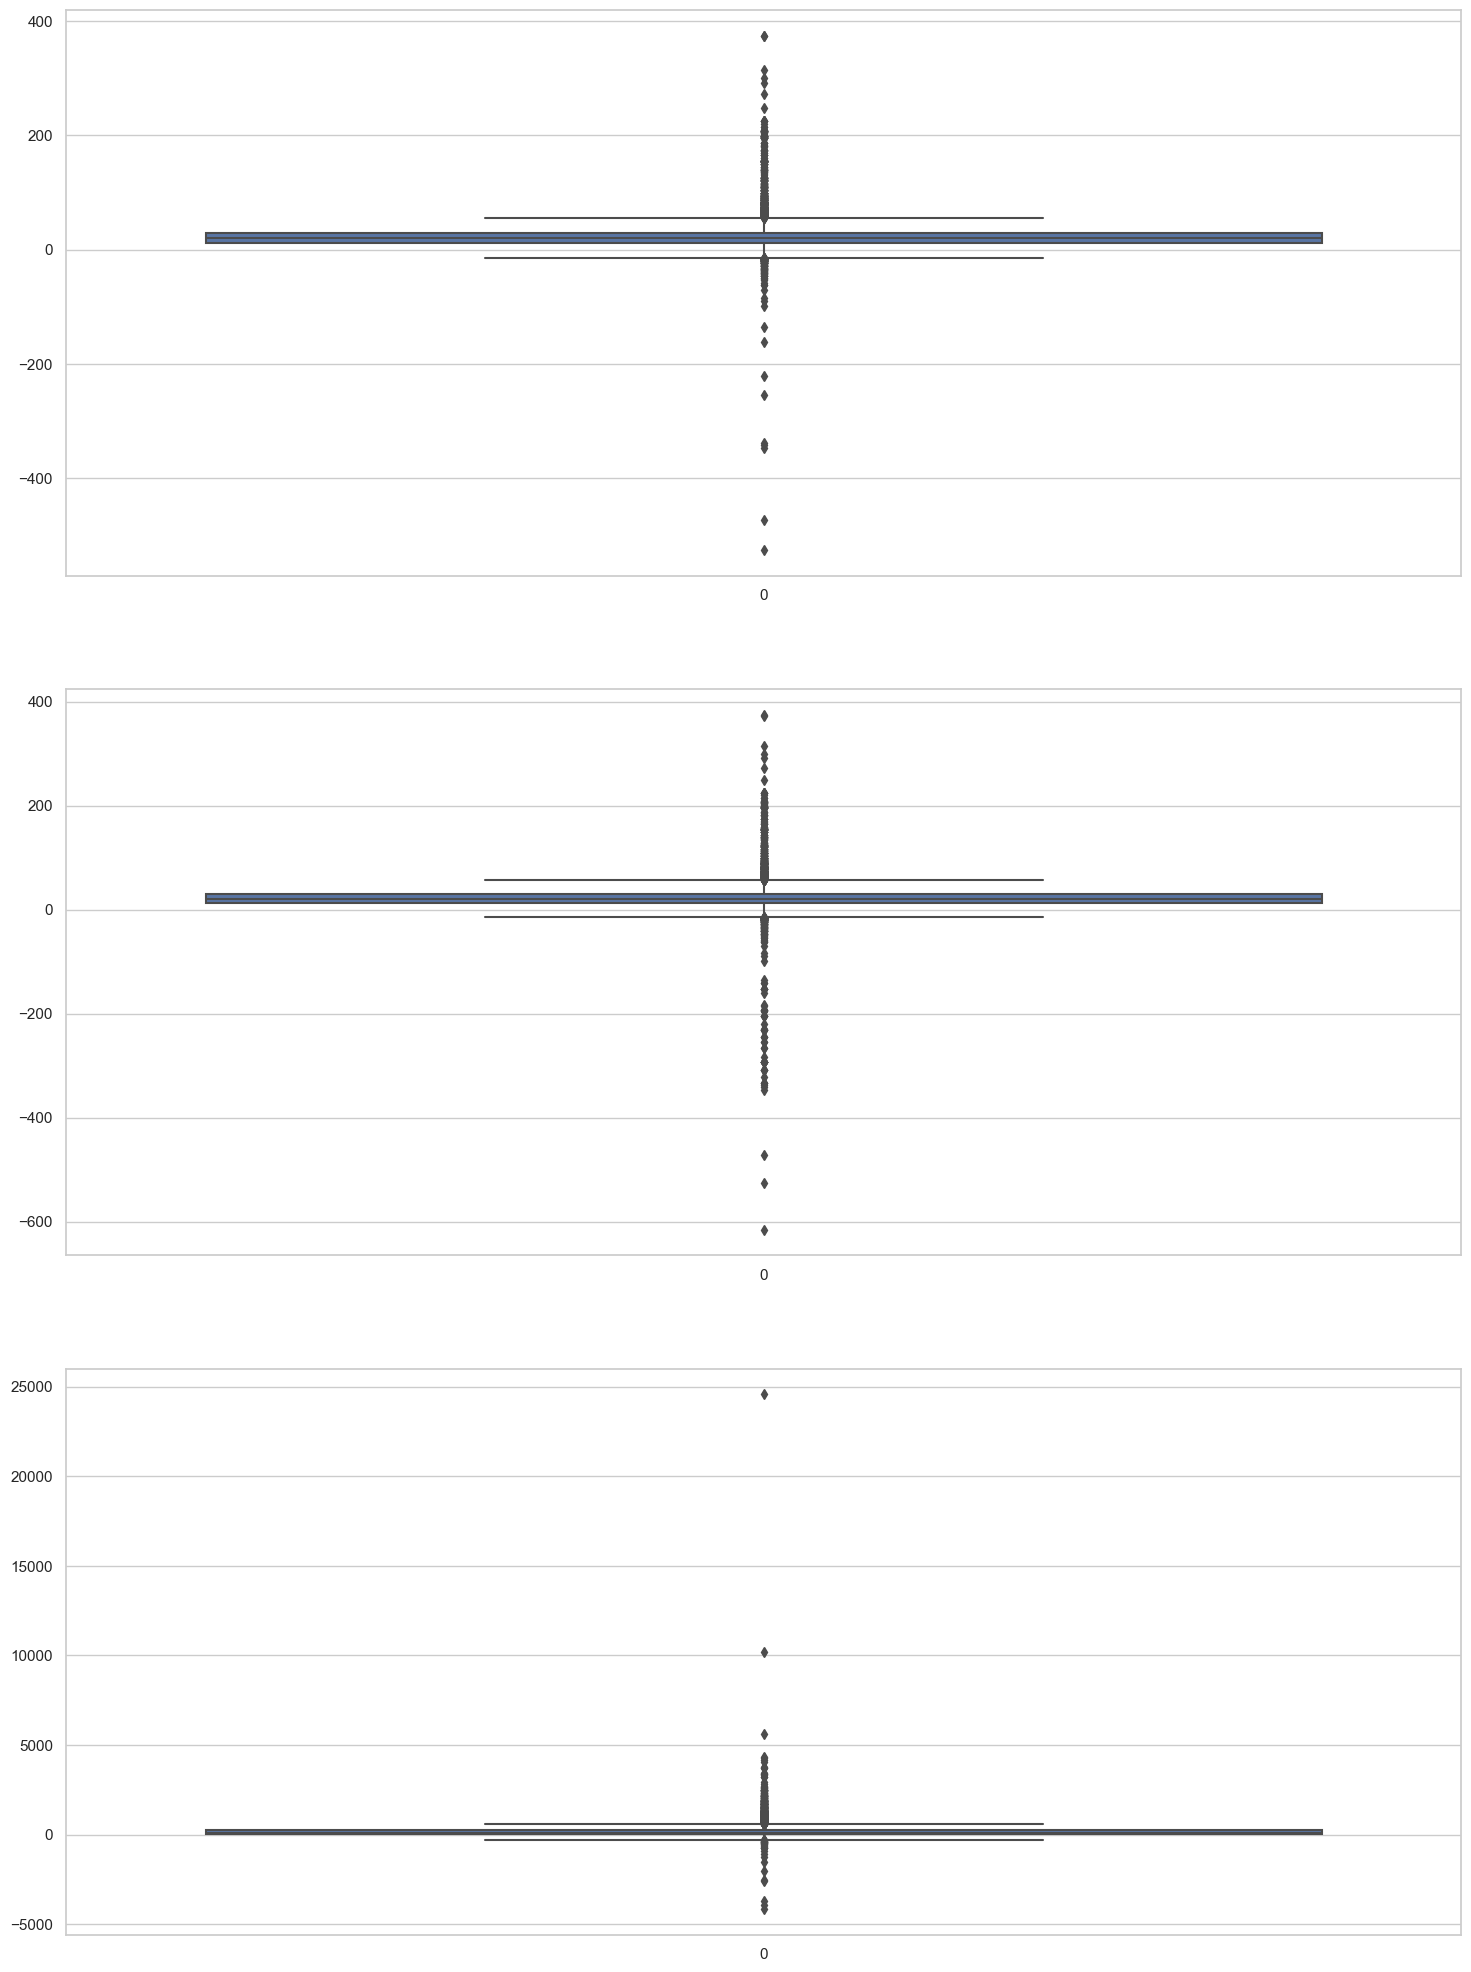

In [128]:
fig, axs = plt.subplots(nrows = 3, figsize = (18, 25))
sns.boxplot(margin['margin_gross_pow_ele'], ax = axs[0]);
sns.boxplot(margin['margin_net_pow_ele'], ax = axs[1]);
sns.boxplot(margin['net_margin'], ax = axs[2]);

#### Maximum Power

In [133]:
power = client_data[['id', 'pow_max', 'churn']].fillna(0)

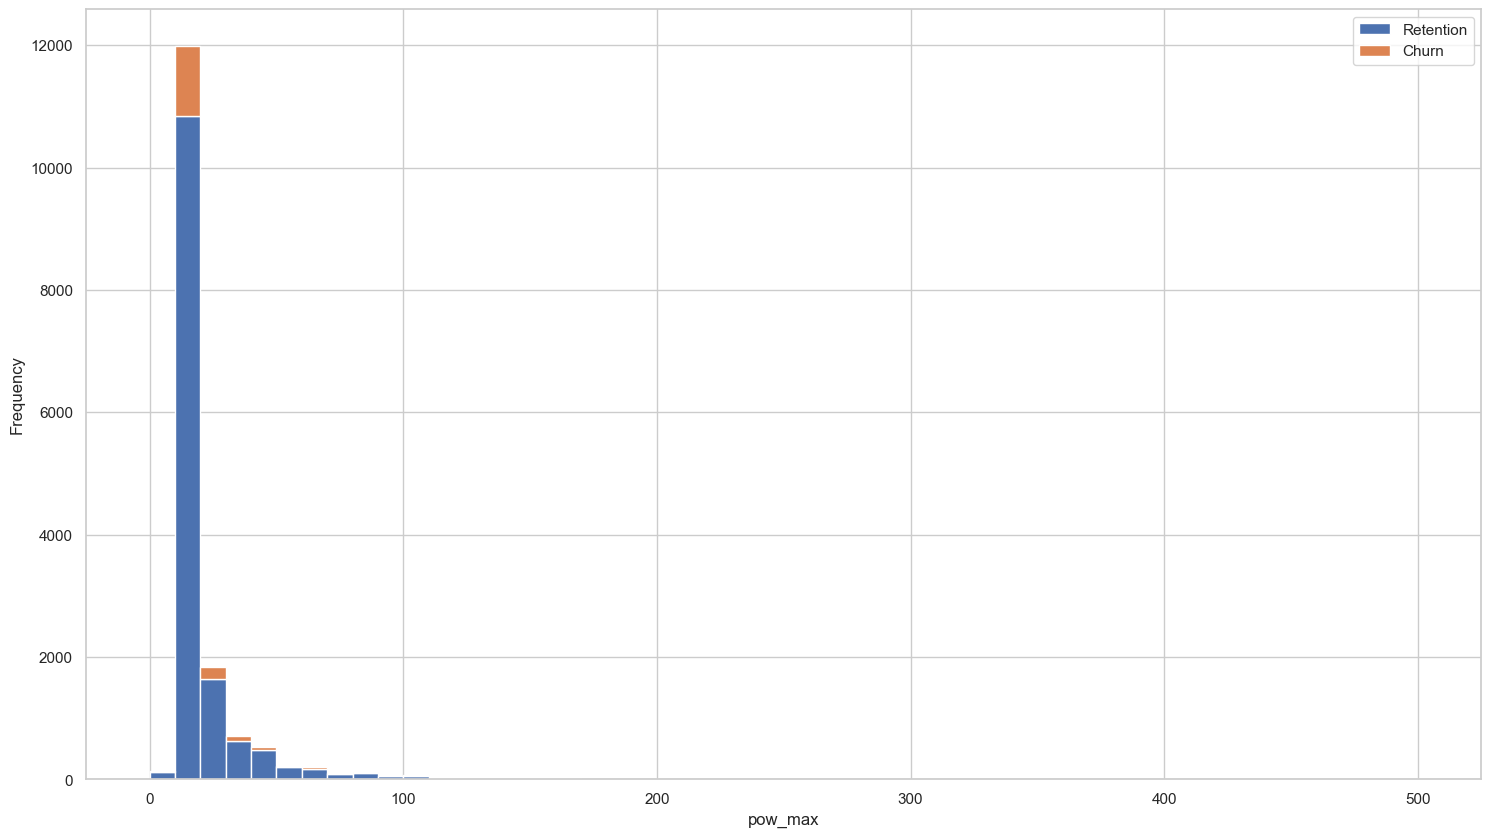

In [135]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 10))
plot_distribution(power, 'pow_max', axs);

#### Others

In [138]:
other = client_data[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

In [140]:
client_data['nb_prod_act'].value_counts()

nb_prod_act
1     12560
2      2708
3       561
4       170
5        37
32       25
9        12
6         9
8         8
31        4
10        2
Name: count, dtype: int64

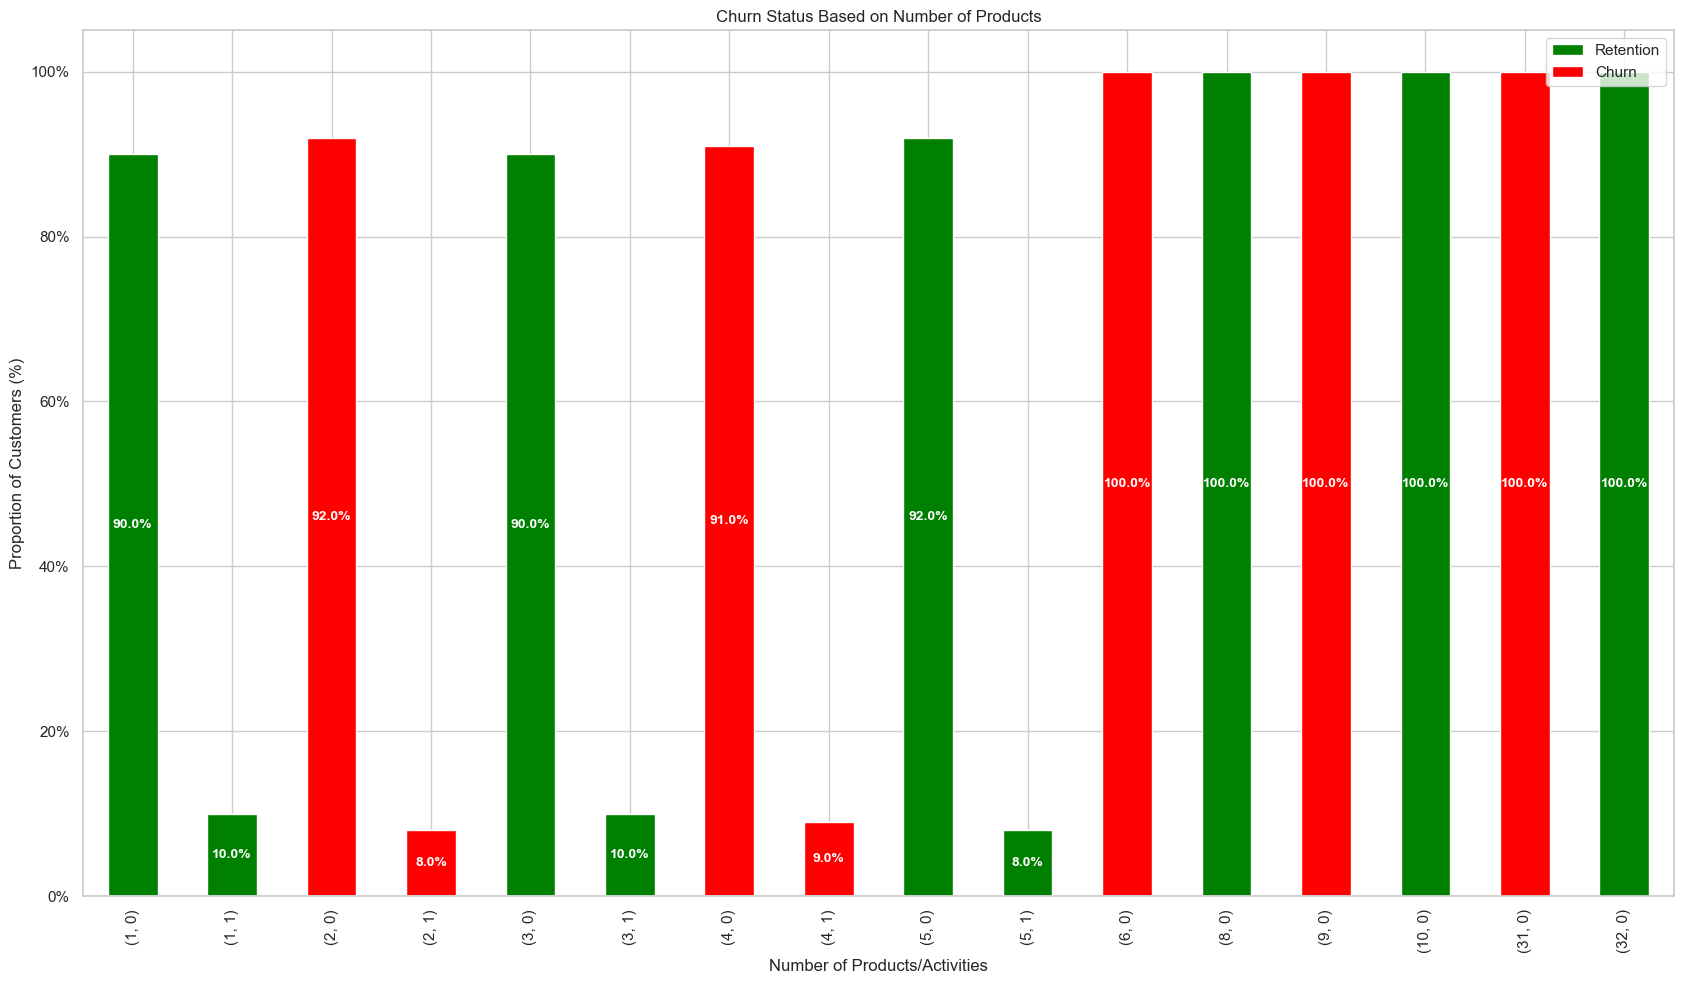

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Step 1: Group and count customers by number of products/activities and churn status
nb_prod_act = other.groupby(['nb_prod_act', 'churn'])['id'].count()

# Step 2: Calculate proportions for churn and retention
nb_prod_act = nb_prod_act.groupby(level=0).apply(lambda x: np.round(x / x.sum(), 2)).unstack(level=1)

# Step 3: Define the function to plot stacked bars with percentage formatting and annotations
def plot_stacked_bars(df, title_, size_=(18, 10), legend_='upper right'):
    """
    Plot stacked bars with annotations and percentage labels.
    """
    ax = df.plot(kind='bar', stacked=True, figsize=size_, title=title_, color=['green', 'red'])
    ax.set_ylabel('Proportion of Customers (%)')
    ax.set_xlabel('Number of Products/Activities')
    ax.legend(['Retention', 'Churn'], loc=legend_)
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # Show percentages on y-axis
    
    # Annotate bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                        ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Step 4: Plot the stacked bars
plot_stacked_bars(nb_prod_act, 'Churn Status Based on Number of Products', (17, 10))


### 4. Data Cleaning
For simplicity we will remove the variables with more than 60% of the values missing from our customer data set.
'We might re-use some of these variables if our model is not good enough'.

#### Missing data/Empty Values

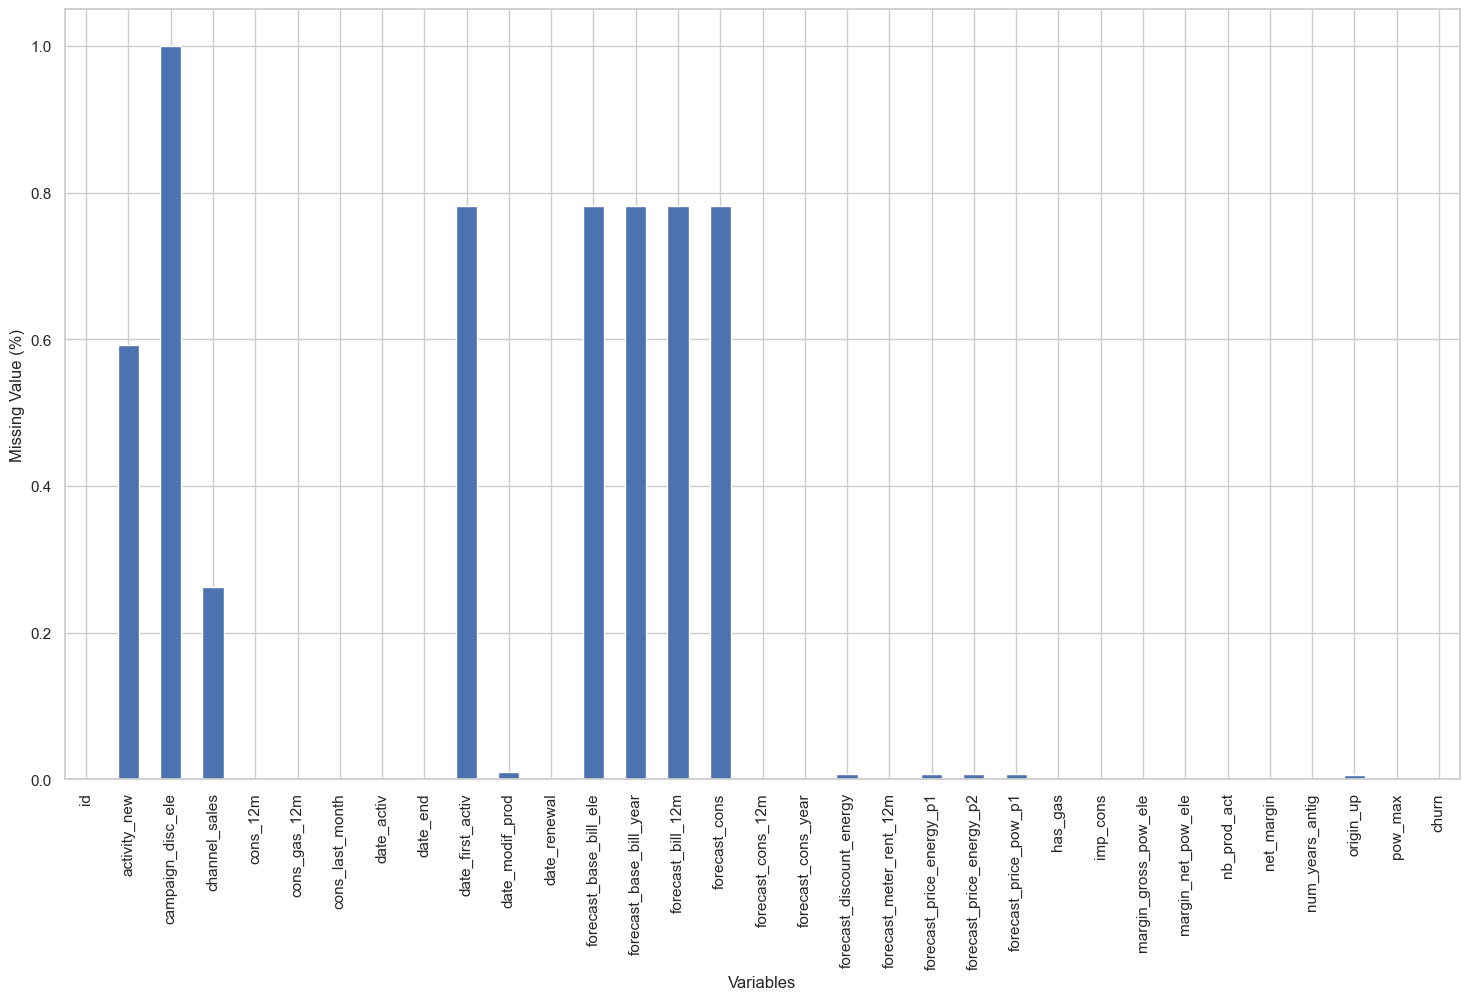

In [148]:
#calculates and visualizes the percentage of missing values in each column of our dataset
(client_data.isnull().sum()/client_data.shape[0]).plot(kind = 'bar', figsize = (18, 10));
plt.xlabel('Variables')
plt.ylabel('Missing Value (%)')
plt.show();

In [150]:
client_data.head()

id                      activity_new  \
0  48ada52261e7cf58715202705a0451c9  esoiiifxdlbkcsluxmfuacbdckommixw   
1  24011ae4ebbe3035111d65fa7c15bc57                               NaN   
2  d29c2c54acc38ff3c0614d0a653813dd                               NaN   
3  764c75f661154dac3a6c254cd082ea7d                               NaN   
4  bba03439a292a1e166f80264c16191cb                               NaN   

   campaign_disc_ele                     channel_sales  cons_12m  \
0                NaN  lmkebamcaaclubfxadlmueccxoimlema    309275   
1                NaN  foosdfpfkusacimwkcsosbicdxkicaua         0   
2                NaN                               NaN      4660   
3                NaN  foosdfpfkusacimwkcsosbicdxkicaua       544   
4                NaN  lmkebamcaaclubfxadlmueccxoimlema      1584   

   cons_gas_12m  cons_last_month date_activ   date_end date_first_activ  \
0             0            10025 2012-11-07 2016-11-06              NaT   
1         54946                0 2013-06-15 2016-06-15              NaT   
2             0                0 2009-08-21 2016-08-30              NaT   
3             0                0 2010-04-16 2016-04-16              NaT   
4             0                0 2010-03-30 2016-03-30              NaT   

  date_modif_prod date_renewal  forecast_base_bill_ele  \
0      2012-11-07   2015-11-09                     NaN   
1             NaT   2015-06-23                     NaN   
2      2009-08-21   2015-08-31                     NaN   
3      2010-04-16   2015-04-17                     NaN   
4      2010-03-30   2015-03-31                     NaN   

   forecast_base_bill_year  forecast_bill_12m  forecast_cons  \
0                      NaN                NaN            NaN   
1                      NaN                NaN            NaN   
2                      NaN                NaN            NaN   
3                      NaN                NaN            NaN   
4                      NaN                NaN            NaN   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           26520.30               10025                       0.0   
1               0.00                   0                       0.0   
2             189.95                   0                       0.0   
3              47.96                   0                       0.0   
4             240.04                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_p1  \
0                   359.29                  0.095919   
1                     1.78                  0.114481   
2                    16.27                  0.145711   
3                    38.72                  0.165794   
4                    19.83                  0.146694   

   forecast_price_energy_p2  forecast_price_pow_p1 has_gas  imp_cons  \
0                  0.088347              58.995952       f     831.8   
1                  0.098142              40.606701       t       0.0   
2                  0.000000              44.311378       f       0.0   
3                  0.087899              44.311378       f       0.0   
4                  0.000000              44.311378       f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                -41.76              -41.76            1     1732.36   
1                 25.44               25.44            2      678.99   
2                 16.38               16.38            1       18.89   
3                 28.60               28.60            1        6.60   
4                 30.22               30.22            1       25.46   

   num_years_antig                         origin_up  pow_max  churn  
0                3  ldkssxwpmemidmecebumciepifcamkci  180.000      0  
1                3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
4                6  k

In [152]:
client_data.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [154]:
pd.DataFrame({'Data_Type' : (client_data.isnull().sum()/client_data.shape[0])*100})

Data_Type
id                          0.000000
activity_new               59.300447
campaign_disc_ele         100.000000
channel_sales              26.205268
cons_12m                    0.000000
cons_gas_12m                0.000000
cons_last_month             0.000000
date_activ                  0.000000
date_end                    0.012425
date_first_activ           78.205765
date_modif_prod             0.975398
date_renewal                0.248509
forecast_base_bill_ele     78.205765
forecast_base_bill_year    78.205765
forecast_bill_12m          78.205765
forecast_cons              78.205765
forecast_cons_12m           0.000000
forecast_cons_year          0.000000
forecast_discount_energy    0.782803
forecast_meter_rent_12m     0.000000
forecast_price_energy_p1    0.782803
forecast_price_energy_p2    0.782803
forecast_price_pow_p1       0.782803
has_gas                     0.000000
imp_cons                    0.000000
margin_gross_pow_ele        0.080765
margin_net_pow_ele          0.080765
nb_prod_act                 0.000000
net_margin                  0.093191
num_years_antig             0.000000
origin_up                   0.540507
pow_max                     0.018638
churn                       0.000000

Dropping columns which over 60% missing values
We decided to do thid because the missing values are morethan the values we need to build our model and we already have enough data to build and train our model 

In [157]:
client_data = client_data.drop(columns=['activity_new', 'campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele',
                              'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons'])

In [159]:
client_data.isnull().sum()

id                             0
channel_sales               4218
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       2
date_modif_prod              157
date_renewal                  40
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy     126
forecast_meter_rent_12m        0
forecast_price_energy_p1     126
forecast_price_energy_p2     126
forecast_price_pow_p1        126
has_gas                        0
imp_cons                       0
margin_gross_pow_ele          13
margin_net_pow_ele            13
nb_prod_act                    0
net_margin                    15
num_years_antig                0
origin_up                     87
pow_max                        3
churn                          0
dtype: int64

#### Filling missing values

In [163]:
client_data['channel_sales'].fillna('MISSING', inplace=True)

In [165]:
client_data['origin_up'].fillna('MISSING', inplace=True)

In [167]:
# Fill NaN values with the mean of the column
client_data['forecast_discount_energy'].fillna(client_data['forecast_discount_energy'].mean(), inplace=True)
client_data['forecast_price_energy_p1'].fillna(client_data['forecast_price_energy_p1'].mean(), inplace=True)
client_data['forecast_price_energy_p2'].fillna(client_data['forecast_price_energy_p2'].mean(), inplace=True)
client_data['forecast_price_pow_p1'].fillna(client_data['forecast_price_pow_p1'].mean(), inplace=True)

In [169]:
# Fill NaN values with the median of the column
client_data['margin_gross_pow_ele'].fillna(client_data['margin_gross_pow_ele'].median(), inplace=True)
client_data['margin_net_pow_ele'].fillna(client_data['margin_net_pow_ele'].median(), inplace=True)
client_data['net_margin'].fillna(client_data['net_margin'].median(), inplace=True)
client_data['pow_max'].fillna(client_data['pow_max'].median(), inplace=True)

In [173]:
pd.DataFrame({'Data_Type' : (price.isnull().sum()/price.shape[0])*100})

Data_Type
id             0.000000
price_date     0.000000
price_p1_var   0.704138
price_p2_var   0.704138
price_p3_var   0.704138
price_p1_fix   0.704138
price_p2_fix   0.704138
price_p3_fix   0.704138

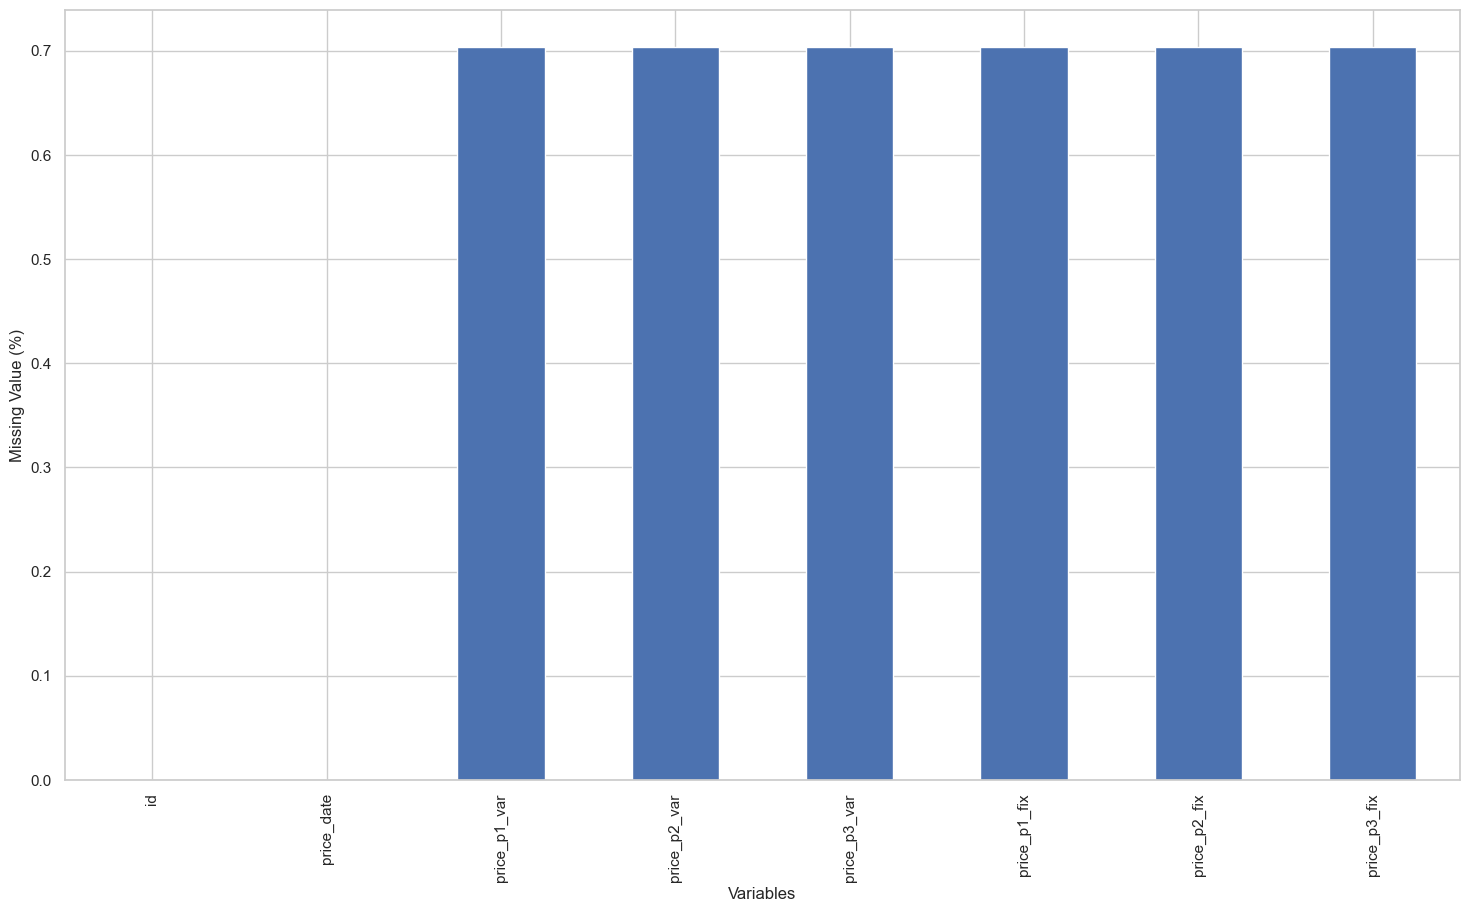

In [175]:
(100*price.isnull().sum()/price.shape[0]).plot(kind = 'bar', figsize = (18, 10));
plt.xlabel('Variables')
plt.ylabel('Missing Value (%)')
plt.show();

In [177]:
#filling the missing values in the specified columns of the price dataset with the median of each respective column
price.loc[price['price_p1_var'].isnull(), 'price_p1_var'] = price['price_p1_var'].median()
price.loc[price['price_p2_var'].isnull(), 'price_p2_var'] = price['price_p2_var'].median()
price.loc[price['price_p3_var'].isnull(), 'price_p3_var'] = price['price_p3_var'].median()
price.loc[price['price_p1_fix'].isnull(), 'price_p1_fix'] = price['price_p1_fix'].median()
price.loc[price['price_p2_fix'].isnull(), 'price_p2_fix'] = price['price_p2_fix'].median()
price.loc[price['price_p3_fix'].isnull(), 'price_p3_fix'] = price['price_p3_fix'].median()


#### Duplicates
We want to make sure all the data we have is unique and we do not have any duplicate rows.

In [182]:
client_data[client_data.duplicated()]

Empty DataFrame
Columns: [id, channel_sales, cons_12m, cons_gas_12m, cons_last_month, date_activ, date_end, date_modif_prod, date_renewal, forecast_cons_12m, forecast_cons_year, forecast_discount_energy, forecast_meter_rent_12m, forecast_price_energy_p1, forecast_price_energy_p2, forecast_price_pow_p1, has_gas, imp_cons, margin_gross_pow_ele, margin_net_pow_ele, nb_prod_act, net_margin, num_years_antig, origin_up, pow_max, churn]
Index: []

### 5. Formatting Data
#### Missing dates
There are several ways we could deal with missing dates.
One way, we could 'engineer' the dates from known values. For example, the `date_renewal` is usually the same date as the `date_modif_prod` but one year ahead.
The simplest way, we will replace the missing values with the mode (the frequent date). For numerical values, the built-in function `.median()` can be used, but will not work for dates or strings, so we will use a workaroound using `.value_counts()`

In [186]:
#filling missing values in three columns (date_modif_prod, date_end, and date_renewal) 
#with the most frequent (mode) value of each respective column
client_data.loc[client_data['date_modif_prod'].isnull(), 'date_modif_prod'] = client_data['date_modif_prod']\
.value_counts()\
.index[0]

client_data.loc[client_data['date_end'].isnull(), 'date_end'] = client_data['date_end']\
.value_counts()\
.index[0]

client_data.loc[client_data['date_renewal'].isnull(), 'date_renewal'] = client_data['date_renewal']\
.value_counts()\
.index[0]

#### Formating dates (historical price data)

In [190]:
#changing the datatype
price['price_date'] = pd.to_datetime(price['price_date'])

#### Negative Data
let's take a look at the historical price data

We can see that there are neagtive values in the following columns `price_p1_fix`, `price_p2_fix`, `price_p3_fix`
Further exploring on these we can see there are only about 10 entries which are negative. This is more likely to be due to corrputed data or data entry errors rather than a 'price' discount.
We will replace the negtive values with the medians of the respective columns

In [194]:
#identifies rows where we have negative values
price[(price.price_p1_fix < 0) |(price.price_p2_fix < 0) | (price.price_p3_fix < 0)]

id price_date  price_p1_var  \
23138   951d99fe07ca94c2139f43bc37095139 2015-03-01      0.125976   
28350   f7bdc6fa1067cd26fd80bfb9f3fca28f 2015-03-01      0.131032   
98575   9b523ad5ba8aa2e524dcda5b3d54dab2 2015-02-01      0.129444   
113467  cfd098ee6c567eb32374c77d20571bc7 2015-02-01      0.123086   
118467  51d7d8a0bf6b8bd94f8c1de7942c66ea 2015-07-01      0.128132   
125819  decc0a647016e183ded972595cd2b9fb 2015-03-01      0.124937   
128761  cc214d7c05de3ee17a7691e274ac488e 2015-06-01      0.124675   
141011  2a4ed325054472e03cdcc9a34693be4b 2015-02-01      0.167317   
160827  395a6f41bbd1a0f23a64f00645264e78 2015-04-01      0.121352   
181811  d4a84ff4ec620151ef05bdef0cf27eab 2015-05-01      0.125976   

        price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix  
23138       0.103395      0.071536     -0.162916     -0.097749     -0.065166  
28350       0.108896      0.076955     -0.162916     -0.097749     -0.065166  
98575       0.106863      0.075004     -0.162916     -0.097749     -0.065166  
113467      0.100505      0.068646     -0.162916     -0.097749     -0.065166  
118467      0.105996      0.074056     -0.162912     -0.097752     -0.065172  
125819      0.102814      0.069071     -0.162916     -0.097749     -0.065166  
128761      0.102539      0.070596     -0.162912     -0.097752     -0.065172  
141011      0.083347      0.000000     -0.177779      0.000000      0.000000  
160827      0.098771      0.066912     -0.162916     -0.097749     -0.065166  
181811      0.103395      0.071536     -0.162916     -0.097749     -0.065166

In [196]:
#updates the specified columns in the price Dataset by replacing any negative values with the median of those respective column
price.loc[price['price_p1_fix'] < 0, 'price_p1_fix'] = price['price_p1_fix'].median()
price.loc[price['price_p2_fix'] < 0, 'price_p2_fix'] = price['price_p2_fix'].median()
price.loc[price['price_p3_fix'] < 0, 'price_p3_fix'] = price['price_p3_fix'].median()


#### Price senstivity

In [201]:
# Renaming columns
price = price.rename(columns={'price_p1_var': 'price_off_peak_var', 'price_p2_var': 'price_peak_var',
                                        'price_p3_var': 'price_mid_peak_var', 'price_p1_fix': 'price_off_peak_fix', 
                                        'price_p2_fix': 'price_peak_fix', 'price_p3_fix': 'price_mid_peak_fix'})


In [203]:
price["id"].value_counts().value_counts()


count
12    15990
11       83
10       11
9         6
8         3
7         3
Name: count, dtype: int64

So every client has atleast 7 months of price data

In [206]:
#function to calculate the mean difference between consecutive elements in an array
#useful when analyzing price changes over time

def get_price_diff_mean(arr):
    diff_arr = np.diff(arr)
    return diff_arr.mean()

In [208]:
price_off_peak_diff = price.groupby("id")["price_off_peak_var"].agg(get_price_diff_mean)
price_off_peak_diff

id
0002203ffbb812588b632b9e628cc38d   -0.000563
0004351ebdd665e6ee664792efc4fd13   -0.000373
0010bcc39e42b3c2131ed2ce55246e3c    0.004586
0010ee3855fdea87602a5b7aba8e42de   -0.000911
00114d74e963e47177db89bc70108537   -0.000363
00126c87cf78d7604278f0a9adeb689e   -0.001173
0013f326a839a2f6ad87a1859952d227   -0.000561
00184e957277eeef733a7b563fdabd06   -0.000374
001987ed9dbdab4efa274a9c7233e1f4   -0.000709
0019baf3ed1242cd99b3cb592030446f    0.010806
001cb880d847a0b63b404a48e50aec17   -0.000913
001cd16732dc7d5bdf46b0d49996c271    0.004336
001dc71143f45cb58aaccc2e94823c5a   -0.000343
0024bc8ffe90ec2d5f5be3b5cd7bf2cf   -0.000342
002b3009d069858b471918402fb237b7   -0.000527
002d70a2bdf9cf62f10d1efbea890f69   -0.000501
002dc7935f7b6f855aaa3d1bd242ab9a   -0.000754
0030bd55614c2c5e693e04b64faa6445   -0.000141
003742573bb97760793ced15e3e11745   -0.000309
003cb4fdda941fb84bcd2be9af683254   -0.000615
003e7fcd19e10f5114c29ce4a6997ba0   -0.004363
003fb333060c256bff67d8d550bff1fa   -0.000709
00420fc

In [210]:
price_peak_diff = price.groupby("id")["price_peak_var"].agg(get_price_diff_mean)
price_peak_diff

id
0002203ffbb812588b632b9e628cc38d   -2.092727e-04
0004351ebdd665e6ee664792efc4fd13    0.000000e+00
0010bcc39e42b3c2131ed2ce55246e3c    0.000000e+00
0010ee3855fdea87602a5b7aba8e42de   -4.654545e-04
00114d74e963e47177db89bc70108537    0.000000e+00
00126c87cf78d7604278f0a9adeb689e   -7.281818e-04
0013f326a839a2f6ad87a1859952d227   -2.137273e-04
00184e957277eeef733a7b563fdabd06    0.000000e+00
001987ed9dbdab4efa274a9c7233e1f4   -2.640000e-04
0019baf3ed1242cd99b3cb592030446f    0.000000e+00
001cb880d847a0b63b404a48e50aec17    0.000000e+00
001cd16732dc7d5bdf46b0d49996c271    0.000000e+00
001dc71143f45cb58aaccc2e94823c5a    0.000000e+00
0024bc8ffe90ec2d5f5be3b5cd7bf2cf    0.000000e+00
002b3009d069858b471918402fb237b7   -2.831818e-04
002d70a2bdf9cf62f10d1efbea890f69    0.000000e+00
002dc7935f7b6f855aaa3d1bd242ab9a   -3.010000e-04
0030bd55614c2c5e693e04b64faa6445    3.342727e-04
003742573bb97760793ced15e3e11745    0.000000e+00
003cb4fdda941fb84bcd2be9af683254    0.000000e+00
003e7fcd19e10f511

In [212]:
price_mid_peak_diff = price.groupby("id")["price_mid_peak_var"].agg(get_price_diff_mean)
price_mid_peak_diff

id
0002203ffbb812588b632b9e628cc38d    3.170000e-04
0004351ebdd665e6ee664792efc4fd13    0.000000e+00
0010bcc39e42b3c2131ed2ce55246e3c    0.000000e+00
0010ee3855fdea87602a5b7aba8e42de    6.936364e-05
00114d74e963e47177db89bc70108537    0.000000e+00
00126c87cf78d7604278f0a9adeb689e   -1.933636e-04
0013f326a839a2f6ad87a1859952d227    3.064545e-04
00184e957277eeef733a7b563fdabd06    0.000000e+00
001987ed9dbdab4efa274a9c7233e1f4    2.709091e-04
0019baf3ed1242cd99b3cb592030446f    0.000000e+00
001cb880d847a0b63b404a48e50aec17    0.000000e+00
001cd16732dc7d5bdf46b0d49996c271    0.000000e+00
001dc71143f45cb58aaccc2e94823c5a    0.000000e+00
0024bc8ffe90ec2d5f5be3b5cd7bf2cf    0.000000e+00
002b3009d069858b471918402fb237b7    0.000000e+00
002d70a2bdf9cf62f10d1efbea890f69    0.000000e+00
002dc7935f7b6f855aaa3d1bd242ab9a    2.457273e-04
0030bd55614c2c5e693e04b64faa6445    0.000000e+00
003742573bb97760793ced15e3e11745    0.000000e+00
003cb4fdda941fb84bcd2be9af683254    0.000000e+00
003e7fcd19e10f511

In [214]:
price_off_peak_fix_diff = price.groupby("id")["price_off_peak_fix"].agg(get_price_diff_mean)
price_off_peak_fix_diff

id
0002203ffbb812588b632b9e628cc38d    1.481051e-02
0004351ebdd665e6ee664792efc4fd13    1.616171e-02
0010bcc39e42b3c2131ed2ce55246e3c    1.363636e-01
0010ee3855fdea87602a5b7aba8e42de    1.481051e-02
00114d74e963e47177db89bc70108537   -1.090909e-07
00126c87cf78d7604278f0a9adeb689e    1.481051e-02
0013f326a839a2f6ad87a1859952d227    0.000000e+00
00184e957277eeef733a7b563fdabd06   -1.090909e-07
001987ed9dbdab4efa274a9c7233e1f4    1.481051e-02
0019baf3ed1242cd99b3cb592030446f    1.358182e+00
001cb880d847a0b63b404a48e50aec17    1.616171e-02
001cd16732dc7d5bdf46b0d49996c271    1.979799e-01
001dc71143f45cb58aaccc2e94823c5a    1.616171e-02
0024bc8ffe90ec2d5f5be3b5cd7bf2cf    1.616171e-02
002b3009d069858b471918402fb237b7    0.000000e+00
002d70a2bdf9cf62f10d1efbea890f69    1.616171e-02
002dc7935f7b6f855aaa3d1bd242ab9a    0.000000e+00
0030bd55614c2c5e693e04b64faa6445    1.616171e-02
003742573bb97760793ced15e3e11745    1.070708e-01
003cb4fdda941fb84bcd2be9af683254   -1.090909e-07
003e7fcd19e10f511

In [216]:
price_peak_fix_diff = price.groupby("id")["price_peak_fix"].agg(get_price_diff_mean)
price_peak_fix_diff

id
0002203ffbb812588b632b9e628cc38d    8.886305e-03
0004351ebdd665e6ee664792efc4fd13    0.000000e+00
0010bcc39e42b3c2131ed2ce55246e3c    0.000000e+00
0010ee3855fdea87602a5b7aba8e42de    8.886305e-03
00114d74e963e47177db89bc70108537    0.000000e+00
00126c87cf78d7604278f0a9adeb689e    8.886305e-03
0013f326a839a2f6ad87a1859952d227    0.000000e+00
00184e957277eeef733a7b563fdabd06    0.000000e+00
001987ed9dbdab4efa274a9c7233e1f4    8.886305e-03
0019baf3ed1242cd99b3cb592030446f    0.000000e+00
001cb880d847a0b63b404a48e50aec17    0.000000e+00
001cd16732dc7d5bdf46b0d49996c271    0.000000e+00
001dc71143f45cb58aaccc2e94823c5a    0.000000e+00
0024bc8ffe90ec2d5f5be3b5cd7bf2cf    0.000000e+00
002b3009d069858b471918402fb237b7    0.000000e+00
002d70a2bdf9cf62f10d1efbea890f69    0.000000e+00
002dc7935f7b6f855aaa3d1bd242ab9a    0.000000e+00
0030bd55614c2c5e693e04b64faa6445    0.000000e+00
003742573bb97760793ced15e3e11745    0.000000e+00
003cb4fdda941fb84bcd2be9af683254    0.000000e+00
003e7fcd19e10f511

In [218]:
price_mid_peak_fix_diff = price.groupby("id")["price_mid_peak_fix"].agg(get_price_diff_mean)
price_mid_peak_fix_diff

id
0002203ffbb812588b632b9e628cc38d    5.924204e-03
0004351ebdd665e6ee664792efc4fd13    0.000000e+00
0010bcc39e42b3c2131ed2ce55246e3c    0.000000e+00
0010ee3855fdea87602a5b7aba8e42de    5.924204e-03
00114d74e963e47177db89bc70108537    0.000000e+00
00126c87cf78d7604278f0a9adeb689e    5.924204e-03
0013f326a839a2f6ad87a1859952d227    0.000000e+00
00184e957277eeef733a7b563fdabd06    0.000000e+00
001987ed9dbdab4efa274a9c7233e1f4    5.924204e-03
0019baf3ed1242cd99b3cb592030446f    0.000000e+00
001cb880d847a0b63b404a48e50aec17    0.000000e+00
001cd16732dc7d5bdf46b0d49996c271    0.000000e+00
001dc71143f45cb58aaccc2e94823c5a    0.000000e+00
0024bc8ffe90ec2d5f5be3b5cd7bf2cf    0.000000e+00
002b3009d069858b471918402fb237b7    0.000000e+00
002d70a2bdf9cf62f10d1efbea890f69    0.000000e+00
002dc7935f7b6f855aaa3d1bd242ab9a    0.000000e+00
0030bd55614c2c5e693e04b64faa6445    0.000000e+00
003742573bb97760793ced15e3e11745    0.000000e+00
003cb4fdda941fb84bcd2be9af683254    0.000000e+00
003e7fcd19e10f511

In [220]:
price_diff = pd.DataFrame()
price_diff["id"] = price_off_peak_diff.index
price_diff["price_off_peak_diff"] = price_off_peak_diff.values
price_diff["price_peak_diff"] = price_peak_diff.values
price_diff["price_mid_peak_diff"] = price_mid_peak_diff.values
price_diff["price_off_peak_fix_diff"] = price_off_peak_fix_diff.values
price_diff["price_peak_fix_diff"] = price_peak_fix_diff.values
price_diff["price_mid_peak_fix_diff"] = price_mid_peak_fix_diff.values
price_diff.head()

id  price_off_peak_diff  price_peak_diff  \
0  0002203ffbb812588b632b9e628cc38d            -0.000563        -0.000209   
1  0004351ebdd665e6ee664792efc4fd13            -0.000373         0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c             0.004586         0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            -0.000911        -0.000465   
4  00114d74e963e47177db89bc70108537            -0.000363         0.000000   

   price_mid_peak_diff  price_off_peak_fix_diff  price_peak_fix_diff  \
0             0.000317             1.481051e-02             0.008886   
1             0.000000             1.616171e-02             0.000000   
2             0.000000             1.363636e-01             0.000000   
3             0.000069             1.481051e-02             0.008886   
4             0.000000            -1.090909e-07             0.000000   

   price_mid_peak_fix_diff  
0                 0.005924  
1                 0.000000  
2                 0.000000  
3                 0.005924  
4                 0.000000

In [222]:
client_price_diff = pd.merge(client_data[["id", "churn"]], price_diff, on="id")
client_price_diff.head()

id  churn  price_off_peak_diff  \
0  48ada52261e7cf58715202705a0451c9      0            -0.000723   
1  24011ae4ebbe3035111d65fa7c15bc57      1             0.001823   
2  d29c2c54acc38ff3c0614d0a653813dd      0            -0.000342   
3  764c75f661154dac3a6c254cd082ea7d      0            -0.000425   
4  bba03439a292a1e166f80264c16191cb      0            -0.000413   

   price_peak_diff  price_mid_peak_diff  price_off_peak_fix_diff  \
0        -0.000350            -0.000149                 0.021518   
1        -0.001628            -0.006503                 0.336451   
2         0.000000             0.000000                 0.016162   
3         0.000048             0.000000                 0.016162   
4         0.000000             0.000000                 0.016162   

   price_peak_fix_diff  price_mid_peak_fix_diff  
0             0.013269                 0.003043  
1            -2.212689                -1.475126  
2             0.000000                 0.000000  
3             0.000000                 0.000000  
4             0.000000                 0.000000

In [224]:
#calculate the mean price differences for different time periods (off-peak, peak, and mid-peak)

client_price_diff["price_off_peak_diff_mean"] = (client_price_diff["price_off_peak_diff"]+client_price_diff["price_off_peak_fix_diff"])/2
client_price_diff["price_peak_diff_mean"] = (client_price_diff["price_peak_diff"]+client_price_diff["price_peak_fix_diff"])/2
client_price_diff["price_mid_peak_diff_mean"] = (client_price_diff["price_mid_peak_diff"]+client_price_diff["price_mid_peak_fix_diff"])/2
client_price_diff_mean = client_price_diff.drop(["price_off_peak_diff", "price_off_peak_fix_diff", "price_peak_diff", "price_peak_fix_diff", "price_mid_peak_diff", "price_mid_peak_fix_diff"], axis=1)
client_price_diff_mean.head()

id  churn  price_off_peak_diff_mean  \
0  48ada52261e7cf58715202705a0451c9      0                  0.010397   
1  24011ae4ebbe3035111d65fa7c15bc57      1                  0.169137   
2  d29c2c54acc38ff3c0614d0a653813dd      0                  0.007910   
3  764c75f661154dac3a6c254cd082ea7d      0                  0.007869   
4  bba03439a292a1e166f80264c16191cb      0                  0.007874   

   price_peak_diff_mean  price_mid_peak_diff_mean  
0              0.006460                  0.001447  
1             -1.107159                 -0.740815  
2              0.000000                  0.000000  
3              0.000024                  0.000000  
4              0.000000                  0.000000

In [226]:
#calculates retention and churn metrics based on price differences in different categories (off-peak, peak, and mid-peak)
#

price_retention_churn = pd.DataFrame()
price_retention_churn["category"] = [
    "price_off_peak_inc",  #Off-peak price increase
    "price_off_peak_con_dec",  #Off-peak price decrease
    "price_peak_inc",  #Peak price increase
    "price_peak_con_dec",  #Peak price decrease
    "price_mid_peak_inc",  #Mid-peak price increase
    "price_mid_peak_con_dec"  #Mid-peak price decrease
]

churn_list = []
retention_list = []

for column in ["price_off_peak_diff_mean", "price_peak_diff_mean", "price_mid_peak_diff_mean"]:
    churn_list.append(len(client_price_diff[(client_price_diff[column] > 0) & (client_price_diff["churn"] ==1)]))
    retention_list.append(len(client_price_diff[(client_price_diff[column] > 0) & (client_price_diff["churn"] ==0)]))
    churn_list.append(len(client_price_diff[(client_price_diff[column] < 0) & (client_price_diff["churn"] ==1)]))
    retention_list.append(len(client_price_diff[(client_price_diff[column] < 0) & (client_price_diff["churn"] ==0)]))

price_retention_churn["retention"] = retention_list
price_retention_churn["churn"] = churn_list
price_retention_churn["retention_perc"] = (price_retention_churn["retention"]/(price_retention_churn["retention"]+price_retention_churn["churn"]))*100
price_retention_churn["churn_perc"] = (price_retention_churn["churn"]/(price_retention_churn["retention"]+price_retention_churn["churn"]))*100

price_retention_churn.head(10)

category  retention  churn  retention_perc  churn_perc
0      price_off_peak_inc      10552   1126       90.357938    9.642062
1  price_off_peak_con_dec       3834    468       89.121339   10.878661
2          price_peak_inc       5766    645       89.939167   10.060833
3      price_peak_con_dec       2230    295       88.316832   11.683168
4      price_mid_peak_inc       5254    645       89.065943   10.934057
5  price_mid_peak_con_dec        692    109       86.392010   13.607990

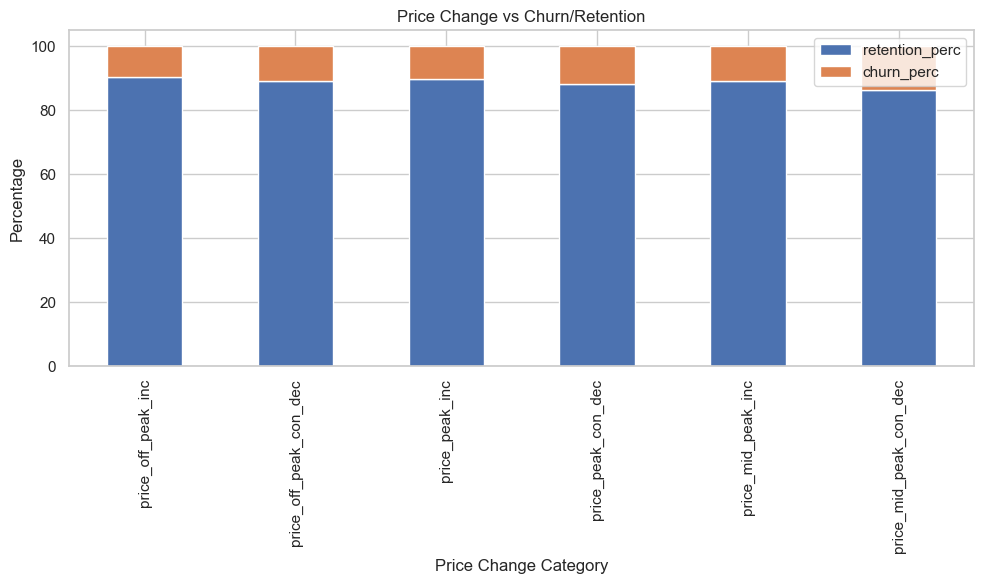

In [238]:

ax = price_retention_churn.set_index('category')[['retention_perc', 'churn_perc']].plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('Price Change Category')
ax.set_ylabel('Percentage')
ax.set_title('Price Change vs Churn/Retention')

plt.tight_layout()
plt.show()


As we can see from the plots, price increase does not influence customer churn. Customers churned even when the price was nearly constant or even decreased.

### FINDINGS

1.We investigated prices at different times and checked the relationship of them with churned customers and proved that changes in prices does not affect customer churn.<br> 
2. Customer churn rate is approximately 10%. <br>
3. Only electricity clients have higher probability to churn than electricity and gas clients together.



<!-- #### FINDINGS

1.We investigated prices at different times and checked the relationship of them with churned customers and proved that changes in prices does not affect customer churn. 2. Approximately 9.7% of customers has churned. 3. Consumption variable are highly skewed. 4. The vast majority of customers' forecasted value of current discount is 0. 5. Most customers haven’t changed their providers for 3 to 6 years. 6. Only electricity clients have higher probability to churn than electricity and gas clients together.

Even if current prices dropped customers still can change their providers because of other reasons. Therefore, I think company should determine these reasons and try to increase customer satisfaction. -->

#### Saving and Loading 
saving and loading Pandas DataFrames

In [244]:
client_data.to_csv('client_data.csv', index=False)
price.to_csv('price_data.csv', index=False)

client_data.to_csv('../Desktop/jupyter/client_data.csv', index=False)
price.to_csv('../Desktop/jupyter/price_data.csv', index=False)
